In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import cobra
import seaborn as sns

In [2]:
Annotation = pd.read_excel('../../Data/R_toruloides_Data_for_Reconstruction.xlsx',
                          sheet_name='Annotation', index_col=0)
Annotation.index = Annotation.index.map(str)
Annotation = Annotation.fillna('')

In [3]:
def background_gradient(s, cmap='seismic', text_color_threshold=0.408):
    lim = max(abs(s.min().min()),abs(s.max().max()))
    rng = 2.0*lim
    norm = colors.Normalize(-lim - (rng * 0.2), lim + (rng * 0.2))
    rgbas = plt.cm.get_cmap(cmap)(norm(s.values))
    def relative_luminance(rgba):
        r, g, b = (x / 12.92 if x <= 0.03928 else ((x + 0.055) / 1.055 ** 2.4) for x in rgba[:3])
        return 0.2126 * r + 0.7152 * g + 0.0722 * b
    def css(rgba):
        dark = relative_luminance(rgba) < text_color_threshold
        text_color = '#f1f1f1' if dark else '#000000'
        return 'background-color: {b};color: {c};'.format(b=colors.rgb2hex(rgba), c=text_color)

    if s.ndim == 1:
        return [css(rgba) for rgba in rgbas]
    else:
        return pd.DataFrame([[css(rgba) for rgba in row] for row in rgbas], index=s.index, columns=s.columns)
    
def Show_Data(x):
    display(Fitness.loc[temp].style.apply(background_gradient, cmap='seismic', axis=None).highlight_null('lightgrey'))
    return;

In [4]:
model = cobra.io.load_json_model("IFO0880_GPR_2d.json")

In [5]:
eco = cobra.io.load_json_model('../../Data/BiGG_Models/iML1515.json')
sce = cobra.io.load_json_model('../../Data/BiGG_Models/iMM904.json')
hsa2 = cobra.io.load_json_model('../../Data/BiGG_Models/Recon3D.json')
ptri = cobra.io.load_json_model('../../Data/BiGG_Models/iLB1027_lipid.json')

In [6]:
Biolog = pd.read_excel('../../Data/Biolog_Media.xlsx',
                        usecols=list(range(0,11)))
Biolog['Row'] = Biolog['Row'].replace(list(range(1,9)), list('ABCDEFGH'))
Biolog = Biolog.sort_values(by=['PlateType','Row','Column'])
Biolog.index = Biolog['PlateType']+'_'+Biolog['Well']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog)

,PlateType,Experiment,Well,Row,Column,Compound,Average,All > NC,Average > 0.1,Pass,Ttest
PM1_A1,PM1,Carbon,A1,A,1,Negative Control,0.086400,False,False,False,5.000000e-01
PM1_A2,PM1,Carbon,A2,A,2,L-Arabinose,0.344767,True,True,True,8.193098e-05
PM1_A3,PM1,Carbon,A3,A,3,N-Acetyl-D-Glucosamine,0.068867,False,False,False,3.061006e-02
PM1_A4,PM1,Carbon,A4,A,4,D-Saccharic Acid,0.071200,False,False,False,1.513148e-02
PM1_A5,PM1,Carbon,A5,A,5,Succinic Acid,0.111200,True,True,True,8.159577e-02
PM1_A6,PM1,Carbon,A6,A,6,D-Galactose,0.143300,True,True,True,1.097891e-05
PM1_A7,PM1,Carbon,A7,A,7,L-Aspartic Acid,0.267867,True,True,True,8.807619e-06
PM1_A8,PM1,Carbon,A8,A,8,L-Proline,0.272400,True,True,True,5.782247e-06
PM1_A9,PM1,Carbon,A9,A,9,D-Alanine,0.121500,True,True,True,4.121000e-03
PM1_A10,PM1,Carbon,A10,A,10,D-Trehalose,0.221300,True,True,True,7.633336e-06


In [7]:
Biolog_Media = pd.read_excel('../../Data/Biolog_Media.xlsx',
                             usecols=list(range(11,17)), index_col=0)
Biolog_Media = Biolog_Media.loc[Biolog_Media[['Carbon','Nitrogen','Phosphorus','Sulfur']].dropna(axis=0, how='all').index]
Biolog_Media

,Source,Carbon,Nitrogen,Phosphorus,Sulfur
Biolog,,,,,
PM1_A2,Carbon,EX_arab__L_e,EX_nh4_e,EX_pi_e,EX_so4_e
PM1_A3,Carbon,EX_acgam_e,EX_nh4_e,EX_pi_e,EX_so4_e
PM1_A4,Carbon,EX_glcr_e,EX_nh4_e,EX_pi_e,EX_so4_e
PM1_A5,Carbon,EX_succ_e,EX_nh4_e,EX_pi_e,EX_so4_e
PM1_A6,Carbon,EX_gal_e,EX_nh4_e,EX_pi_e,EX_so4_e
...,...,...,...,...,...
PM4A_H6,Sulfur,EX_pyr_e,EX_nh4_e,EX_pi_e,EX_taur_e
PM4A_H7,Sulfur,EX_pyr_e,EX_nh4_e,EX_pi_e,EX_hyptaur_e
PM4A_H9,Sulfur,EX_pyr_e,EX_nh4_e,EX_pi_e,EX_butso3_e


In [8]:
print(Biolog.shape)
print(Biolog_Media.shape)

(384, 11)
(285, 5)


In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog[~Biolog.index.isin(Biolog_Media.index)])

,PlateType,Experiment,Well,Row,Column,Compound,Average,All > NC,Average > 0.1,Pass,Ttest
PM1_A1,PM1,Carbon,A1,A,1,Negative Control,0.086400,False,False,False,0.500000
PM1_C5,PM1,Carbon,C5,C,5,Tween 20,0.397733,True,True,True,0.000036
PM1_D3,PM1,Carbon,D3,D,3,D-Glucosaminic Acid,0.083900,False,False,False,0.295679
PM1_D5,PM1,Carbon,D5,D,5,Tween 40,0.347467,True,True,True,0.000003
PM1_D8,PM1,Carbon,D8,D,8,a-Methyl-D-Galactoside,0.081267,False,False,False,0.226319
PM1_D10,PM1,Carbon,D10,D,10,Lactulose,0.083933,False,False,False,0.420182
PM1_E5,PM1,Carbon,E5,E,5,Tween 80,0.408233,True,True,True,0.000855
PM1_E6,PM1,Carbon,E6,E,6,a-Hydroxy Glutaric Acid-g-Lactone,0.064367,False,False,False,0.034193
PM1_F4,PM1,Carbon,F4,F,4,D-Threonine,0.112333,False,True,False,0.086383
PM1_F6,PM1,Carbon,F6,F,6,Bromo Succinic Acid,0.173133,True,True,True,0.000013


In [10]:
Biolog_in_model = pd.DataFrame(columns=['Biolog','Model','Exchange','Metabolite',
                                        'Internal','External','Average','Pass'])
for i, row in Biolog.iterrows():
    if i in Biolog_Media.index:
        x = Biolog_Media.loc[i]
        Biolog_in_model.loc[i,'Exchange'] = x[x['Source']]
        Biolog_in_model.loc[i,'Metabolite'] = x[x['Source']].replace('EX_','')
        if ',' in Biolog_in_model.loc[i,'Metabolite']:
            Biolog_in_model.loc[i,'Model'] = [model.metabolites.get_by_id(x).name if x in model.metabolites \
                else next((model.metabolites.get_by_id(x.rsplit('_',1)[0]+'_'+c).name for c in model.compartments \
                    if x.rsplit('_',1)[0]+'_'+c in model.metabolites), None) \
                for x in Biolog_in_model.loc[i,'Metabolite'].split(',')]
            Biolog_in_model.loc[i,'Internal'] = all(any(x.rsplit('_',1)[0]+'_'+c in model.metabolites
                                                        for c in model.compartments) \
                                                     for x in Biolog_in_model.loc[i,'Metabolite'].split(','))
            Biolog_in_model.loc[i,'External'] = all(x in model.metabolites \
                                                    for x in Biolog_in_model.loc[i,'Metabolite'].split(','))
        else:
            Biolog_in_model.loc[i,'Model'] = model.metabolites.get_by_id(Biolog_in_model.loc[i,'Metabolite']).name \
                if Biolog_in_model.loc[i,'Metabolite'] in model.metabolites \
                else next((model.metabolites.get_by_id(Biolog_in_model.loc[i,'Metabolite'].rsplit('_',1)[0]+'_'+c).name \
                    for c in model.compartments 
                          if Biolog_in_model.loc[i,'Metabolite'].rsplit('_',1)[0]+c in model.metabolites), None)
            Biolog_in_model.loc[i,'Internal'] = any(Biolog_in_model.loc[i,'Metabolite'].rsplit('_',1)[0]+'_'+c
                                                    in model.metabolites for c in model.compartments)
            Biolog_in_model.loc[i,'External'] = Biolog_in_model.loc[i,'Metabolite'] in model.metabolites
    else:
        Biolog_in_model.loc[i] = None
    Biolog_in_model.loc[i,'Biolog'] = row['Compound']
    Biolog_in_model.loc[i,'Average'] = row['Average']
    Biolog_in_model.loc[i,'Pass'] = row['Pass']

In [11]:
model.medium

{'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_glc__D_e': 1.0,
 'EX_ca2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [12]:
Biolog_Prediction = pd.DataFrame(columns=['PlateType','Experiment','Row','Column',
                                          'Data','Data_TF','Prediction','Prediction_TF'])
with model:
    model.reactions.get_by_id('ATPM').lower_bound = 0.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_nh4_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_pi_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_so4_e').lower_bound = 0.0
    for i, row in Biolog.iterrows():
        Biolog_Prediction.loc[i,'PlateType'] = row['PlateType']
        Biolog_Prediction.loc[i,'Experiment'] = row['Experiment']
        Biolog_Prediction.loc[i,'Row'] = row['Row']
        Biolog_Prediction.loc[i,'Column'] = row['Column']
        Biolog_Prediction.loc[i,'Data'] = row['Average']
        Biolog_Prediction.loc[i,'Data_TF'] = row['Pass']
        if i in Biolog_Media.index and Biolog_in_model.loc[i,'External']:
            for x in Biolog_Media.loc[i][1:]:
                if ',' in x:
                    for y in x.split(','):
                        model.reactions.get_by_id(y).lower_bound = -10.0
                else:
                    model.reactions.get_by_id(x).lower_bound = -10.0
            sol = model.optimize()
            for x in Biolog_Media.loc[i][1:]:
                if ',' in x:
                    for y in x.split(','):
                        model.reactions.get_by_id(y).lower_bound = 0.0
                else:
                    model.reactions.get_by_id(x).lower_bound = 0.0
            if sol.status == 'optimal':
                Biolog_Prediction.loc[i,'Prediction'] = sol.objective_value
                Biolog_Prediction.loc[i,'Prediction_TF'] = sol.objective_value > 1e-3
            else:
                print(i, 'non-optimal')
                Biolog_Prediction.loc[i,'Prediction'] = np.nan
                Biolog_Prediction.loc[i,'Prediction_TF'] = np.nan
        elif i in Biolog_Media.index and Biolog_in_model.loc[i,'Internal']:
            continue
            for x in Biolog_Media.loc[i,Biolog_Media.loc[i,'Source']].split(','):
                if not x in model.reactions:
                    r = model.reactions.get_by_id('EX_h_e').copy()
                    r.id = x
                    model.add_reactions([r])
                    r.add_metabolites({'h_e': 1.0, x.replace('EX_','').rsplit('_',1)[0]+'_c': -1.0})
            for x in Biolog_Media.loc[i][1:]:
                if ',' in x:
                    for y in x.split(','):
                        model.reactions.get_by_id(y).lower_bound = -10.0
                else:
                    model.reactions.get_by_id(x).lower_bound = -10.0
            sol = model.optimize()
            for x in Biolog_Media.loc[i][1:]:
                if ',' in x:
                    for y in x.split(','):
                        model.reactions.get_by_id(y).lower_bound = 0.0
                else:
                    model.reactions.get_by_id(x).lower_bound = 0.0
            if sol.status == 'optimal':
                Biolog_Prediction.loc[i,'Prediction'] = sol.objective_value
                Biolog_Prediction.loc[i,'Prediction_TF'] = sol.objective_value > 1e-3
            else:
                print(i, 'non-optimal')
                Biolog_Prediction.loc[i,'Prediction'] = np.nan
                Biolog_Prediction.loc[i,'Prediction_TF'] = np.nan
        else:
            Biolog_Prediction.loc[i,'Prediction'] = np.nan
            Biolog_Prediction.loc[i,'Prediction_TF'] =np.nan
            #Biolog_Prediction.loc[i,'Prediction'] = 0.0
            #Biolog_Prediction.loc[i,'Prediction_TF'] = False

In [13]:
Biolog_Prediction['Data'] = Biolog_Prediction['Data'].astype(float)
Biolog_Prediction['Prediction'] = Biolog_Prediction['Prediction'].astype(float)
Biolog_Prediction.loc[abs(Biolog_Prediction.Prediction) < 1e-6, 'Prediction'] = 0

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog_Prediction)

,PlateType,Experiment,Row,Column,Data,Data_TF,Prediction,Prediction_TF
PM1_A1,PM1,Carbon,A,1,0.086400,False,NaN,NaN
PM1_A2,PM1,Carbon,A,2,0.344767,True,0.630546,True
PM1_A3,PM1,Carbon,A,3,0.068867,False,0.000000,False
PM1_A4,PM1,Carbon,A,4,0.071200,False,NaN,NaN
PM1_A5,PM1,Carbon,A,5,0.111200,True,NaN,NaN
PM1_A6,PM1,Carbon,A,6,0.143300,True,0.756655,True
PM1_A7,PM1,Carbon,A,7,0.267867,True,0.356350,True
PM1_A8,PM1,Carbon,A,8,0.272400,True,0.000000,False
PM1_A9,PM1,Carbon,A,9,0.121500,True,0.076596,True
PM1_A10,PM1,Carbon,A,10,0.221300,True,NaN,NaN


In [15]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef

In [16]:
temp = Biolog_Prediction.index[~np.isnan(Biolog_Prediction.Prediction)]
y_data = Biolog_Prediction.Data_TF[temp].astype(int)
y_pred = Biolog_Prediction.Prediction_TF[temp].astype(int)
TN, FP, FN, TP = confusion_matrix(y_data, y_pred).ravel()
print(TN, FP, FN, TP, sum([TN, FP, FN, TP]))

12 6 22 76 116


In [17]:
df_confusion = pd.DataFrame(confusion_matrix(y_data, y_pred),
                            index = pd.MultiIndex.from_product([['Experiment'],['No growth', 'Growth']]),
                            columns = pd.MultiIndex.from_product([['Prediction'],['No growth', 'Growth']]))
df_confusion

Prediction       
                      No growth Growth
Experiment No growth         12      6
           Growth            22     76

In [18]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Matthew's
MCC = matthews_corrcoef(y_data, y_pred)
print('Recall:', TPR.round(3))
print('Precision:', PPV.round(3))
print('Accuracy:', ACC.round(3))
print('Matthew\'s correlation:', MCC.round(3))

Recall: 0.776
Precision: 0.927
Accuracy: 0.759
Matthew's correlation: 0.352


In [19]:
print(sum(~Biolog_in_model['Exchange'].isna()))
print(len(Biolog_in_model.query('External == True and Internal == False')))
print(len(Biolog_in_model.query('External == False and Internal == True')))
print(len(Biolog_in_model.query('External == True and Internal == True')))
print(len(Biolog_in_model.query('External == False and Internal == False')))

285
0
93
116
76


In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog_in_model)

,Biolog,Model,Exchange,Metabolite,Internal,External,Average,Pass
PM1_A1,Negative Control,NaN,NaN,NaN,NaN,NaN,0.0864,False
PM1_A2,L-Arabinose,L-Arabinose,EX_arab__L_e,arab__L_e,True,True,0.344767,True
PM1_A3,N-Acetyl-D-Glucosamine,N-Acetyl-D-glucosamine,EX_acgam_e,acgam_e,True,True,0.0688667,False
PM1_A4,D-Saccharic Acid,None,EX_glcr_e,glcr_e,False,False,0.0712,False
PM1_A5,Succinic Acid,None,EX_succ_e,succ_e,True,False,0.1112,True
PM1_A6,D-Galactose,D-Galactose,EX_gal_e,gal_e,True,True,0.1433,True
PM1_A7,L-Aspartic Acid,L-Aspartate,EX_asp__L_e,asp__L_e,True,True,0.267867,True
PM1_A8,L-Proline,L-Proline,EX_pro__L_e,pro__L_e,True,True,0.2724,True
PM1_A9,D-Alanine,D-Alanine,EX_ala__D_e,ala__D_e,True,True,0.1215,True
PM1_A10,D-Trehalose,None,EX_tre_e,tre_e,True,False,0.2213,True


In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog_in_model.loc[Biolog_in_model['Biolog'].duplicated(keep=False)].sort_values('Biolog'))

,Biolog,Model,Exchange,Metabolite,Internal,External,Average,Pass
PM2_G1,Acetamide,None,EX_ad_e,ad_e,True,False,0.0881333,False
PM3B_E4,Acetamide,None,EX_ad_e,ad_e,True,False,0.149867,True
PM3B_F3,Adenosine,Adenosine,EX_adn_e,adn_e,True,True,0.2381,True
PM1_E12,Adenosine,Adenosine,EX_adn_e,adn_e,True,True,0.077,False
PM1_A9,D-Alanine,D-Alanine,EX_ala__D_e,ala__D_e,True,True,0.1215,True
PM3B_C3,D-Alanine,D-Alanine,EX_ala__D_e,ala__D_e,True,True,0.146133,True
PM3B_C5,D-Aspartic Acid,None,EX_asp__D_e,asp__D_e,True,False,0.1008,False
PM1_D2,D-Aspartic Acid,None,EX_asp__D_e,asp__D_e,True,False,0.0959667,False
PM2_E5,D-Glucosamine,D-Glucosamine,EX_gam_e,gam_e,True,True,0.171867,True
PM3B_E8,D-Glucosamine,D-Glucosamine,EX_gam_e,gam_e,True,True,0.1291,True


In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog_in_model[Biolog_in_model['Exchange'].isna()])

,Biolog,Model,Exchange,Metabolite,Internal,External,Average,Pass
PM1_A1,Negative Control,NaN,NaN,NaN,NaN,NaN,0.0864,False
PM1_C5,Tween 20,NaN,NaN,NaN,NaN,NaN,0.397733,True
PM1_D3,D-Glucosaminic Acid,NaN,NaN,NaN,NaN,NaN,0.0839,False
PM1_D5,Tween 40,NaN,NaN,NaN,NaN,NaN,0.347467,True
PM1_D8,a-Methyl-D-Galactoside,NaN,NaN,NaN,NaN,NaN,0.0812667,False
PM1_D10,Lactulose,NaN,NaN,NaN,NaN,NaN,0.0839333,False
PM1_E5,Tween 80,NaN,NaN,NaN,NaN,NaN,0.408233,True
PM1_E6,a-Hydroxy Glutaric Acid-g-Lactone,NaN,NaN,NaN,NaN,NaN,0.0643667,False
PM1_F4,D-Threonine,NaN,NaN,NaN,NaN,NaN,0.112333,False
PM1_F6,Bromo Succinic Acid,NaN,NaN,NaN,NaN,NaN,0.173133,True


In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog_in_model.query('External == False and Internal == False'))

,Biolog,Model,Exchange,Metabolite,Internal,External,Average,Pass
PM1_A4,D-Saccharic Acid,None,EX_glcr_e,glcr_e,False,False,0.0712,False
PM1_B4,L-Fucose,None,EX_fuc__L_e,fuc__L_e,False,False,0.0996667,False
PM1_B5,D-Glucuronic Acid,None,EX_glcur_e,glcur_e,False,False,0.0718333,False
PM1_B11,D-Mannitol,None,EX_mnl_e,mnl_e,False,False,0.120767,True
PM1_C3,"D-,L-Malic Acid","[None, L-Malate]","EX_mal__D_e,EX_mal__L_e","mal__D_e,mal__L_e",False,False,0.1148,True
PM1_C6,L-Rhamnose,None,EX_rmn_e,rmn_e,False,False,0.0937333,False
PM1_C11,D-Melibiose,None,EX_melib_e,melib_e,False,False,0.0763,False
PM1_D9,a-D-Lactose,None,EX_lcts_e,lcts_e,False,False,0.0810333,False
PM1_E2,m-Tartaric Acid,None,EX_tartr__M_e,tartr__M_e,False,False,0.0671667,False
PM1_E7,a-Hydroxy Butyric Acid,None,EX_2hb_e,2hb_e,False,False,0.0992,False


In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog_in_model.query('External == False and Internal == True'))

,Biolog,Model,Exchange,Metabolite,Internal,External,Average,Pass
PM1_A5,Succinic Acid,None,EX_succ_e,succ_e,True,False,0.1112,True
PM1_A10,D-Trehalose,None,EX_tre_e,tre_e,True,False,0.2213,True
PM1_A12,Dulcitol,None,EX_galt_e,galt_e,True,False,0.132067,True
PM1_B1,D-Serine,None,EX_ser__D_e,ser__D_e,True,False,0.1506,True
PM1_B2,D-Sorbitol,None,EX_sbt__D_e,sbt__D_e,True,False,0.124767,True
PM1_B6,D-Gluconic Acid,None,EX_glcn_e,glcn_e,True,False,0.143467,True
PM1_B7,"D,L-a-GlycerolPhosphate",None,EX_glyc3p_e,glyc3p_e,True,False,0.0722,False
PM1_C1,D-Glucose-6-Phosphate,None,EX_g6p_e,g6p_e,True,False,0.0870333,False
PM1_C2,D-Galactonic Acid-g-Lactone,None,EX_galctn__D_e,galctn__D_e,True,False,0.0559,False
PM1_C4,D-Ribose,None,EX_rib__D_e,rib__D_e,True,False,0.3129,True


Carbon sources

S. cer JEN1 does not transport succinate or malate, but K. lactis's does  
https://onlinelibrary.wiley.com/doi/full/10.1111/j.1574-6976.2008.00128.x  
Growth on succinate or malate is weak, do not add transport reactions  
Trehalase 8580 (cyto) and 8376 (extr), remove TREHv by 8376 and add TREHe  
Trehalose proton symporter 9137 and 13485 MALTt2 (also maltose MALTt2)  
R. toruloides did not consume much akg in IL hydrolysate and growth is weak, do not add transport  
For metabolites with unknown transporters, add diffusion if available

In [25]:
# Succinate
r = sce.reactions.get_by_id('EX_succ_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# Trehalose
r1 = hsa2.reactions.get_by_id('EX_tre_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('TREHe').copy()
r2.gene_reaction_rule = '8376'
r3 = sce.reactions.get_by_id('TREt2').copy()
r3.gene_reaction_rule = '9137 or 13485'
model.add_reactions([r1, r2, r3])
model.remove_reactions(['TREHv'], remove_orphans=True)
model.reactions.get_by_id('MALTt2').gene_reaction_rule = '9137 or 13485'
# Galactitol
r1 = hsa2.reactions.get_by_id('EX_galt_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('GALTt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# D-Serine
r1 = eco.reactions.get_by_id('EX_ser__D_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('HMR_9191').copy()
r2.id = 'SER_Dt'
r2.name = 'D-serine transport'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# D-Sorbitol
r1 = sce.reactions.get_by_id('EX_sbt__D_e').copy()
r1.lower_bound = 0.0
r2 = sce.reactions.get_by_id('SBT_Dt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# D-Gluconate
r1 = hsa2.reactions.get_by_id('EX_glcn_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('GLCNte').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Glycerol 3-phosphate
r = hsa2.reactions.get_by_id('EX_glyc3p_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# D-Glucose 6-phosphate
r = eco.reactions.get_by_id('EX_g6p_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])

In [26]:
for r in model.metabolites.get_by_id('galctn__D_n').reactions:
    print(r, r.gene_reaction_rule)

GALO: gal_n + h2o_n + o2_n --> galctn__D_n + h2o2_n + h_n 16104


In [27]:
Annotation.loc[['16104','8542']]

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
16104,"HMMPfam:Glyoxal oxidase N-terminus:PF07250,HMM...",S,,,,,Essential,extr 27,WAL*
8542,"HMMPfam:Glyoxal oxidase N-terminus:PF07250,HMM...",S,,,,,Not Essential,extr 27,SAS*


In [28]:
# 16104 is glyoxal oxidase, not Galactose oxidase. Substrates include, methylglyoxal, glycolaldehyde,
## acetaldehyde, formaldehyde and glyoxal.
gxl_e = cobra.Metabolite(id='gxl_e', name='Glyoxal', formula='C2H2O2', charge=0, compartment='e')
m = model.metabolites.get_by_id('mthgxl_c').copy()
m.id = 'mthgxl_e'
m.compartment = 'e'
model.add_metabolites([gxl_e, m])
# Add exchange for h2o2
r1 = hsa2.reactions.get_by_id('EX_h2o2_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('H2O2t').copy()
model.add_reactions([r1, r2])
# Add glyoxal and methylglyoxal oxidase
r1 = cobra.Reaction(id='GXLOe', name='Glyoxal oxidase, extracellular')
r1.gene_reaction_rule = '16104 or 8542'
r2 = cobra.Reaction(id='MTHGXLe', name='Methylglyoxal oxidase, extracellular')
r2.gene_reaction_rule = '16104 or 8542'
model.add_reactions([r1, r2])
r1.add_metabolites({'gxl_e': -1.0, 'o2_e': -1.0, 'h2o_e': -1.0, 'glx_e': 1.0, 'h2o2_e': 1.0, 'h_e': 1.0})
r2.add_metabolites({'mthgxl_e': -1.0, 'o2_e': -1.0, 'h2o_e': -1.0, 'pyr_e': 1.0, 'h2o2_e': 1.0, 'h_e': 1.0})
# Remove wrong reaction by 16104
model.remove_reactions(['GALO'], remove_orphans=True)

In [29]:
# D-Ribose
r1 = hsa2.reactions.get_by_id('EX_rib__D_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('RIBt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Thymidine
r1 = hsa2.reactions.get_by_id('EX_thymd_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('THYMDt1').copy()
r2.gene_reaction_rule = '13969'
model.add_reactions([r1, r2])
# D-Aspartic Acid
r1 = hsa2.reactions.get_by_id('EX_asp__D_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('ASPDTDe').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# 1,2-Propanediol
r1 = eco.reactions.get_by_id('EX_12ppd__S_e').copy()
r1.lower_bound = 0.0
r2 = eco.reactions.get_by_id('12PPDStpp').copy()
r2.id = '12PPDSt'
r2.name = '(R)-Propane-1,2-diol facilitated transport'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r2.add_metabolites({'12ppd__S_p': 1.0, '12ppd__S_e': -1.0})
# R-form needs to be secreted out
r1 = hsa2.reactions.get_by_id('EX_12ppd__R_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('12PPDRte').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# 2-Oxoglutarate
r = sce.reactions.get_by_id('EX_akg_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# D-Glucose 1-phosphate
r = hsa2.reactions.get_by_id('EX_g1p_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# D-Fructose-6-Phosphate
r = eco.reactions.get_by_id('EX_f6p_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# Maltotriose
r1 = hsa2.reactions.get_by_id('EX_malttr_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('MLTG1e').copy()
r2.gene_reaction_rule = '14743'
r3 = hsa2.reactions.get_by_id('MALTe').copy()
r3.gene_reaction_rule = '14743'
model.add_reactions([r1, r2, r3])

10170 is mannosyl-oligosaccharide alpha-1,3-glucosidase [EC:3.2.1.207]  
cleaves off sequentially the 2 innermost α-1,3-linked glucose residues  
GlcMan9GlcNAc2-[protein] + H2O → Man9GlcNAc2-[protein] + α-D-glucopyranose 
Glc2Man9GlcNAc2-[protein] + H2O → GlcMan9GlcNAc2-[protein] + α-D-glucopyranose  

9135 is oligo-1,6-glucosidase [EC:3.2.1.10]  
hdrolysis of (1→6)-α-D-glucosidic linkages in some oligosaccharides  
Sucrose + H2O <=> D-Fructose + D-Glucose  
Isomaltose + H2O <=> alpha-D-Glucose + D-Glucose  
Starch + H2O <=> D-Glucose + Starch  
Dextrin + H2O <=> D-Glucose + Dextrin  

12639 is glycogen debranching enzyme [EC:2.4.1.25 3.2.1.33]  
2.4.1.25 transfers a segment of a (1→4)-α-D-glucan to a new position
Amylose + n D-Glucose <=> n Maltose  
1,4-alpha-D-Glucan + n D-Glucose <=> n Maltose  
3.2.1.33 hydrolyses an unsubstituted glucose unit linked by an α(1→6) bond to an α(1→4) glucose chain
Starch + H2O <=> Amylose + alpha-D-Glucose  
Starch + H2O <=> 1,4-alpha-D-Glucan + alpha-D-Glucose  

14743 is glucoamylase (glucan 1,4-α-glucosidase) [EC:3.2.1.3]  
hydrolysis of terminal (1→4)-linked α-D-glucose residues  
Starch + H2O <=> D-Glucose + Starch  
Dextrin + H2O <=> D-Glucose + Dextrin  

11993 is alpha-amylase (1,4-α-D-glucan glucanohydrolase) [EC:3.2.1.1]  
catalyzes the endohydrolysis of (1→4)-α-D-glucosidic linkages in polysaccharides  
Starch + H2O <=> Dextrin + Starch  
Starch <=> Dextrin + Maltose  
Starch(n+m) + H2O <=> Starch(n) + Starch(m)  
Maltodextrin + H2O <=> Maltose  

12594 is 1,4-alpha-glucan branching enzyme [EC:2.4.1.18]  
transfers a segment of a 1,4-α-D-glucan chain to a primary hydroxyl group in a similar glucan chain, forming a 1,6 branch point.
Amylose <=> Starch  
1,4-alpha-D-Glucan <=> Starch  

13553 is glucan 1,3-beta-glucosidase [EC:3.2.1.58]  
1,3-beta-D-Glucan(n+1) + H2O <=> D-Glucose + 1,3-beta-D-Glucan(n)

In [30]:
temp = ['10170','9135','14743','12639','11993','12594','13553','14256']
Annotation.loc[temp]

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
10170,"K05546: GANAB; alpha 1,3-glucosidase",S,ROT2,"GANAB,GANC",ROT2,GANAB,Not Essential,"mito 17, extr 5, cyto 3",DEL*
9135,"K01182: IMA, malL; oligo-1,6-glucosidase",,"MAL32,IMA1,MAL12,YIL172C,IMA5,IMA4,IMA2",SLC3A1,IMA1,SLC3A,Not Essential,"cyto 11.5, cyto_nucl 10, pero 8, nucl 5.5",FVF*
14743,K01178: E3.2.1.3; glucoamylase,,SGA1,,SGA1,,Not Essential,"mito 22, cyto 4",GRE*
12639,K01196: AGL; glycogen debranching enzyme,S,GDB1,"AC096949.1,AGL",GDB1,AGL,Not Essential,"cyto_mito 9.666, cyto 9.5, mito 8.5, cyto_nucl...",ARN*
11993,"K01176: AMY, amyA, malS; alpha-amylase",,,,,,Not Essential,"cyto 10.5, nucl 9, cyto_mito 8, mito 4.5",GKK*
12594,"K00700: GBE1, glgB; 1,4-alpha-glucan branching...",,GLC3,GBE1,GLC3,GBE1,Not Essential,"cyto 13, cyto_nucl 10.333, cyto_pero 9.333, nu...",LAH*
13553,"K01210: E3.2.1.58; glucan 1,3-beta-glucosidase",A,,,EXG1,,Essential,"extr 19, plas 4, mito 1, E.R. 1, golg 1, vacu 1",GRQ*
14256,"K00688: PYG, glgP; glycogen phosphorylase",,GPH1,"PYGB,PYGL,PYGM",GPH1,PYGL,Not Essential,"cyto 12.5, cyto_nucl 10.5, nucl 7.5, pero 6",QDA*


In [31]:
for x in temp:
    for r in model.genes.get_by_id(x).reactions:
        print(r.id, r.reaction, r.gene_reaction_rule)
    print()

XYHDL h2o_c + iprimv_c --> glc__D_c + xyl__D_c 10170
MG3A asnglcnacglcnacman_man_manman_manman_manmanmanglc_c + h2o_c --> Glc_aD_c + asnglcnacglcnacman_man_manman_manman_manmanman_c 10170
MG2A asnglcnacglcnacman_man_manman_manman_manmanmanglcglc_c + h2o_c --> Glc_aD_c + asnglcnacglcnacman_man_manman_manman_manmanmanglc_c 10170
SQGH h2o_c + sqg_c --> glyc_c + sq_c 10170
MG3B asnglcnacglcnacman_man_manman_manman_manmanmanglc_c + h2o_c --> asnglcnacglcnacman_man_manman_manman_manmanman_c + glc__D_c 10170
MLTG1 h2o_c + malttr_c --> glc__D_c + malt_c 10170
MG2B asnglcnacglcnacman_man_manman_manman_manmanmanglcglc_c + h2o_c --> asnglcnacglcnacman_man_manman_manman_manmanmanglc_c + glc__D_c 10170
MALT h2o_c + malt_c --> 2.0 glc__D_c 10170 or 9135

AMY1e 8.0 h2o_e + strch1_e --> 8.0 glc__D_e + strch2_e 9135
AMY2e glygn2_e + 8.0 h2o_e --> 8.0 glc__D_e + glygn4_e 9135
DGGH 6dg_c + h2o_c --> gal_c + glc__D_c 9135
TRE6PH h2o_c + tre6p_c --> g6p_c + glc__D_c 9135
MALT h2o_c + malt_c --> 2.0 glc__D_

In [32]:
# Not found in R. toruloides, only in iML1515
model.remove_reactions(['XYHDL','SQGH'], remove_orphans=True)
# Maltose breakdown by α-1,4-glucosidase
model.reactions.get_by_id('MLTG1').gene_reaction_rule = '14743'
model.reactions.get_by_id('MALT').gene_reaction_rule = '14743'
model.remove_reactions(['GLCGSDv'], remove_orphans=True)
# 6dg_c is melibiose replace DGGH with GALS3 by 9135
r1 = sce.reactions.get_by_id('EX_melib_e').copy()
r1.lower_bound = 0.0
r2 = sce.reactions.get_by_id('MELIBt2').copy()
r2.gene_reaction_rule = ''
r3 = sce.reactions.get_by_id('GALS3').copy()
r3.gene_reaction_rule = '9135'
model.add_reactions([r1, r2, r3])
model.remove_reactions(['DGGH'], remove_orphans=True)
# Glycogen breakdown by 1,4 or 1,6
model.reactions.get_by_id('GLCGSD').gene_reaction_rule = '12639 or 14743'

Glycogen metabolism  
In S. cerevisiae  
synthesis GLYGS h2o_c + udpg_c --> 14glun_c + h_c + udp_c 14002 and 9596  
synthesis GLCS2 udpg_c → glycogen_c + h_c + udp_c 14002 and 9596  
branching GBEZ 14glun_c → glycogen_c + h2o_c 12594  
phosphorylase GLCP glycogen_c + pi_c → g1p_c 14256  
breakdown GLCGSD glycogen_c + h2o_c → glc__D_c 12639  
In E. coli  
synthesis GLCS1 adpglc_c → adp_c + glycogen_c + h_c #absent  
branching GLBRAN2 glycogen_c → bglycogen_c 12594  
debranching GLDBRAN2 bglycogen_c → glycogen_c #absent  
phosphorylase GLCP glycogen_c + pi_c → g1p_c 14256  
phosphorylase GLCP2 bglycogen_c + pi_c → g1p_c 14256  
In Human  
synthesis GGNG Tyr_ggn_c + 8.0 udpg_c --> ggn_c + 8.0 h_c + 8.0 udp_c 14002 and 9596  
synthesis GLGNS1 ggn_c + 3.0 udpg_c --> glygn1_c + 3.0 h_c + 3.0 udp_c 14002 and 9596  
branching GLBRAN glygn1_c --> glygn2_c 12594  
debranching GLDBRAN dxtrn_c + h2o_c --> glc__D_c + glygn3_c 12639  
breakdown GLPASE1 glygn2_c + 3.0 pi_c --> dxtrn_c + 3.0 g1p_c 14256  
breakdown GLPASE2 glygn3_c + 7.0 h2o_c --> Tyr_ggn_c + 7.0 glc__D_c 14256  
Discrepancies between models
14glun_c is unbranched glycogen in S. cer (glycogen_c in E. coli, glygn1_c in Human)  
glycogen_c is branched glycogen in S. cer (bglycogen_c in E. coli, glygn2_c in Human)  
14glucan_c is 1,4 glucan of 6 glucose units in E. coli, replace with 14glun

In [33]:
model.remove_reactions(['GLBRAN2','GLCP2','GGNG','GLGNS1','GLBRAN','GLDBRAN','GLPASE1','GLPASE2'], remove_orphans=True)
# update AAMYL replacing 14glucan_c with 14glun_c
r = model.reactions.get_by_id('AAMYL')
r.id = 'AAMYLASE'
r.add_metabolites({'14glucan_c': 1.0, '14glun_c': -6.0, 'h2o_c': 5.0})
# 14glun is break down to malthx_c, starting from 6 unit add maltase reactions, remove 7 unit reactions
model.remove_reactions(['MLTP3'], remove_orphans=True)
for x in ['MLTG4','MLTG3','MLTG2']:
    r = eco.reactions.get_by_id(x).copy()
    r.gene_reaction_rule = '14743'
    model.add_reactions([r])

In [34]:
# Citrate
r = sce.reactions.get_by_id('EX_cit_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# Fumarate
r = sce.reactions.get_by_id('EX_fum_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# Propionate
r1 = hsa2.reactions.get_by_id('EX_ppa_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('PPAtr').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Cellobiose
# Add extracellular beta-glucosidase reaction for cellobiose, BG_CELLB exists in iYO844
# 16716 and 16717 are annotated as extracellular beta-glucosidase
r1 = eco.reactions.get_by_id('EX_cellb_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('BGLA').copy()
r2.id = 'BG_CELLB'
r2.name = 'Beta glucosidase cellobiose'
r2.gene_reaction_rule = '16716 or 16717'
model.add_reactions([r1, r2])
for m, v in r2.metabolites.items():
    if m.id.replace('_c','_e') not in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_c','_e')
        m2.compartment = 'e'
        model.add_metabolites([m2])
    r2.add_metabolites({m.id: -v, m.id.replace('_c','_e'): v})
# Acetoacetate
r1 = hsa2.reactions.get_by_id('EX_acac_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('ACACt2').copy()
r2.gene_reaction_rule = '11257' #SLC16A7
model.add_reactions([r1, r2])
r1 = hsa2.reactions.get_by_id('ACACt2m').copy()
r1.gene_reaction_rule = '15773 and 16581' #MPC
r2 = hsa2.reactions.get_by_id('ACACtx').copy()
r2.gene_reaction_rule = '' #diffusion
model.add_reactions([r1, r2])
# L-Malate
r = sce.reactions.get_by_id('EX_mal__L_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# Tyramine
r1 = hsa2.reactions.get_by_id('EX_tym_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('TYMte').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Phenethylamine
r = eco.reactions.get_by_id('EX_peamn_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])
# Ethanolamine
r1 = hsa2.reactions.get_by_id('EX_etha_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('ETHAt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])

In [35]:
# Glycogen
m = model.metabolites.get_by_id('glycogen_c').copy()
m.id = 'glycogen_e'
m.compartment = 'e'
model.add_metabolites([m])
r = model.reactions.get_by_id('EX_h_e').copy()
r.id = 'EX_glycogen_e'
r.name = 'Glycogen exchange'
r.gene_reaction_rule = ''
r.lower_bound = 0.0
model.add_reactions([r])
r.add_metabolites({'h_e': 1.0, 'glycogen_e': -1.0})
# Mannan
m = model.metabolites.get_by_id('mannan_r').copy()
m.id = 'mannan_e'
m.compartment = 'e'
model.add_metabolites([m])
r = model.reactions.get_by_id('EX_h_e').copy()
r.id = 'EX_mannan_e'
r.name = 'Mannan exchange'
r.gene_reaction_rule = ''
r.lower_bound = 0.0
model.add_reactions([r])
r.add_metabolites({'h_e': 1.0, 'mannan_e': -1.0})
# D-arabinose
r1 = sce.reactions.get_by_id('EX_arab__D_e').copy()
r1.lower_bound = 0.0
r2 = sce.reactions.get_by_id('ARAB_Dt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# D-arabinose can also be converted to D-arabitol by XYL1
# https://www.tandfonline.com/doi/full/10.1080/09168451.2016.1204221
r = model.reactions.get_by_id('ARABR').copy()
r.id = 'DARABR'
r.name = 'D-Arabinose reductase'
r.gene_reaction_rule = '9774'
model.add_reactions([r])
r.add_metabolites({'arab__L_c': 1.0, 'abt_c': -1.0, 'arab__D_c': -1.0, 'abt__D_c': 1.0})
# Deoxyribose
r1 = hsa2.reactions.get_by_id('EX_drib_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('DRIBt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# L-Sorbose
r1 = sce.reactions.get_by_id('EX_srb__L_e').copy()
r1.lower_bound = 0.0
r2 = sce.reactions.get_by_id('SRB_Lt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Butyrate
r1 = hsa2.reactions.get_by_id('EX_but_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('BUTt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Hexanoate
r1 = hsa2.reactions.get_by_id('EX_hxa_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('HXAt3').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])

In [36]:
# Add degradation pathways for C4 and C6 fatty acids
# Fatty acid CoA ligase
r1 = hsa2.reactions.get_by_id('HMR_0156').copy()
r1.id = 'FACOAL40'
r1.name = 'Fatty-acid--CoA ligase (butanoate)'
r1.gene_reaction_rule = '11167 or 15746 or 15748'
r2 = model.reactions.get_by_id('FACOAL80').copy()
r2.id = 'FACOAL60'
r2.name = 'Fatty-acid--CoA ligase (hexanoate)'
r2.gene_reaction_rule = '11167 or 15746 or 15748'
model.add_reactions([r1, r2])
r2.add_metabolites({'octa_c': 1.0, 'occoa_c': -1.0, 'hxa_c': -1.0, 'hxcoa_c': 1.0})
# CRN O-acetyltransferase in cyto
r1 = hsa2.reactions.get_by_id('C40CPT1').copy()
r1.lower_bound = 0.0
r1.gene_reaction_rule = '9315'
r2 = hsa2.reactions.get_by_id('C60CPT1').copy()
r2.lower_bound = 0.0
r2.gene_reaction_rule = '9315'
model.add_reactions([r1, r2])
# CRN transport mitochondrial
r1 = model.reactions.get_by_id('C160CRNt').copy()
r1.id = 'C40CRNt'
r1.name = 'C40 transport into the mitochondria'
r1.gene_reaction_rule = '9331'
r2 = model.reactions.get_by_id('C160CRNt').copy()
r2.id = 'C60CRNt'
r2.name = 'C60 transport into the mitochondria'
r2.gene_reaction_rule = '9331'
model.add_reactions([r1, r2])
m1 = hsa2.metabolites.get_by_id('c4crn_m').copy()
m2 = hsa2.metabolites.get_by_id('c6crn_c').copy()
m2.id = 'c6crn_m'
m2.compartment = 'm'
model.add_metabolites([m1, m2])
r1.add_metabolites({'pmtcrn_c': 1.0, 'pmtcrn_m': -1.0, 'c4crn_c': -1.0, 'c4crn_m': 1.0})
r2.add_metabolites({'pmtcrn_c': 1.0, 'pmtcrn_m': -1.0, 'c6crn_c': -1.0, 'c6crn_m': 1.0})
# CRN O-acetyltransferase in mito
r1 = model.reactions.get_by_id('C160CPT2').copy()
r1.id = 'C40CPT2'
r1.name = 'C40 transport into the mitochondria'
r1.gene_reaction_rule = '14245'
r2 = model.reactions.get_by_id('C160CPT2').copy()
r2.id = 'C60CPT2'
r2.name = 'C60 transport into the mitochondria'
r2.gene_reaction_rule = '14245'
model.add_reactions([r1, r2])
r1.add_metabolites({'pmtcrn_m': 1.0, 'pmtcoa_m': -1.0, 'c4crn_m': -1.0, 'btcoa_m': 1.0})
r2.add_metabolites({'pmtcrn_m': 1.0, 'pmtcoa_m': -1.0, 'c6crn_m': -1.0, 'hxcoa_m': 1.0})
# CRN transport peroxisomal
model.reactions.get_by_id('CRNtp').gene_reaction_rule = '10149'

In [37]:
# 4-hydroxybenzoate
r1 = hsa2.reactions.get_by_id('EX_4hbz_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('4HBZte').copy()
r2.lower_bound = -1000.0
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# beta-hydroxybutyrate
r1 = hsa2.reactions.get_by_id('EX_bhb_e').copy()
r1.name = '(R)-3-Hydroxybutanoate exchange'
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('BHBt').copy()
r2.gene_reaction_rule = ''
r3 = hsa2.reactions.get_by_id('BHBtm').copy()
r3.gene_reaction_rule = ''
model.add_reactions([r1, r2, r3])
# gamma-hydroxybutyrate
r1 = hsa2.reactions.get_by_id('EX_bhb_e').copy()
r1.id = 'EX_ghb_e'
r1.name = 'Gamma-hydroxybutyrate exchange'
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('BHBt').copy()
r2.id = 'GHBt'
r2.name = 'Gamma-hydroxybutyrate transport via H+ symport'
r2.gene_reaction_rule = ''
r3 = hsa2.reactions.get_by_id('BHBtm').copy()
r3.id = 'GHBtm'
r3.name = 'Gamma-hydroxybutyrate mitochondrial transport via H+ symport'
r3.gene_reaction_rule = ''
r4 = hsa2.reactions.get_by_id('4ABUTtm').copy()
r4.gene_reaction_rule = ''
model.add_reactions([r1, r2, r3, r4])
m1 = model.metabolites.get_by_id('ghb_m').copy()
m1.id = 'ghb_e'
m1.compartment = 'e'
m2 = model.metabolites.get_by_id('ghb_m').copy()
m2.id = 'ghb_c'
m2.compartment = 'c'
model.add_metabolites([m1, m2])
r1.add_metabolites({'bhb_e': 1.0, 'ghb_e': -1.0})
r2.add_metabolites({'bhb_e': 1.0, 'bhb_c': -1.0, 'ghb_e': -1.0, 'ghb_c': 1.0})
r3.add_metabolites({'bhb_c': 1.0, 'bhb_m': -1.0, 'ghb_c': -1.0, 'ghb_m': 1.0})
# 5-ketogluconate
r1 = eco.reactions.get_by_id('EX_5dglcn_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('CO2t').copy()
r2.id = '5DGLCNt'
r2.name = '5-ketogluconate transport via diffusion'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r2.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, '5dglcn_e': -1.0, '5dglcn_c': 1.0})
# Quinic Acid
r1 = eco.reactions.get_by_id('EX_quin_e').copy()
r1.lower_bound = 0.0
r2 = eco.reactions.get_by_id('QUIN2tex').copy()
r2.id = 'QUINt'
r2.name = 'Quinate transport via diffusion'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r2.add_metabolites({'quin_p': -1.0, 'quin_c': 1.0})

In [38]:
# Acetamide
m = model.metabolites.get_by_id('ad_c').copy()
m.id = 'ad_e'
m.compartment = 'e'
model.add_metabolites([m])
r = model.reactions.get_by_id('EX_h_e').copy()
r.id = 'EX_ad_e'
r.name = 'Acetamide exchange'
r.gene_reaction_rule = ''
r.lower_bound = 0.0
model.add_reactions([r])
r.add_metabolites({'h_e': 1.0, 'ad_e': -1.0})
r = model.reactions.get_by_id('CO2t').copy()
r.id = 'ADtr'
r.name = 'Acetamide transport, extracellular'
r.gene_reaction_rule = ''
model.add_reactions([r])
r.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, 'ad_e': -1.0, 'ad_c': 1.0})
# N-Acetyl-L-Glutamic Acid
r1 = hsa2.reactions.get_by_id('EX_acglu_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('ACGLUtd').copy()
r2.lower_bound = -1000.0
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# L-Homoserine
r1 = hsa2.reactions.get_by_id('EX_hom__L_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('r2535').copy()
r2.id = 'HOMt'
r2.name = 'L-Homoserine transport via diffusion'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Dihydroxyacetone
r1 = eco.reactions.get_by_id('EX_dha_e').copy()
r1.lower_bound = 0.0
r2 = eco.reactions.get_by_id('DHAtex').copy()
r2.id = 'DHAt'
r2.name = 'Dihydroxyacetone transport via diffusion'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r2.add_metabolites({'dha_p': -1.0, 'dha_c': 1.0})
# 2,3-Butanediol
r1 = sce.reactions.get_by_id('EX_btd_RR_e').copy()
r1.lower_bound = 0.0
r2 = sce.reactions.get_by_id('BTDt_RR').copy()
r2.lower_bound = -1000.0
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])

Nitrogen, Phosphate, and Sulfur sources

In [39]:
# L-Citrulline
r1 = hsa2.reactions.get_by_id('EX_citr__L_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('r0817').copy()
r2.id = 'CITRte'
r2.name = 'L-Citrulline transport via diffusion'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Methylamine
r1 = hsa2.reactions.get_by_id('EX_mma_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('MMAt2e').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Agmatine
r1 = hsa2.reactions.get_by_id('EX_agm_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('AGRMte').copy()
r2.gene_reaction_rule = ''
r3 = hsa2.reactions.get_by_id('AGMt_m').copy()
r3.gene_reaction_rule = ''
model.add_reactions([r1, r2, r3])
# Histamine
r1 = hsa2.reactions.get_by_id('EX_hista_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('HISTAtu').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Formamide
m = model.metabolites.get_by_id('frmd_c').copy()
m.id = 'frmd_e'
m.compartment = 'e'
model.add_metabolites([m])
r = model.reactions.get_by_id('EX_h_e').copy()
r.id = 'EX_frmd_e'
r.name = 'Formamide exchange'
r.gene_reaction_rule = ''
r.lower_bound = 0.0
model.add_reactions([r])
r.add_metabolites({'h_e': 1.0, 'frmd_e': -1.0})
r = model.reactions.get_by_id('CO2t').copy()
r.id = 'FRMDt'
r.name = 'Formamide transport via diffusion'
r.gene_reaction_rule = ''
model.add_reactions([r])
r.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, 'frmd_e': -1.0, 'frmd_c': 1.0})

In [40]:
# L-Guanosine
r1 = hsa2.reactions.get_by_id('EX_gsn_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('GSNt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Thymine
r1 = hsa2.reactions.get_by_id('EX_thym_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('THYMt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Xanthine
r1 = hsa2.reactions.get_by_id('EX_xan_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('XANt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Xanthosine
r1 = hsa2.reactions.get_by_id('EX_xtsn_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('XTSNtr').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Pyrophosphate
r1 = hsa2.reactions.get_by_id('EX_ppi_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('PIt2r').copy()
r2.id = 'PPIt2r'
r2.name = 'Diphosphate reversible transport via symport'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r2.add_metabolites({'pi_e': 1.0, 'pi_c': -1.0, 'ppi_e': -1.0, 'ppi_c': 1.0})
# Tripolyphosphate
m = model.metabolites.get_by_id('pppi_c').copy()
m.id = 'pppi_e'
m.compartment = 'e'
model.add_metabolites([m])
r1 = hsa2.reactions.get_by_id('EX_ppi_e').copy()
r1.id = 'EX_pppi_e'
r1.name = 'Triphosphate exchange'
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('PIt2r').copy()
r2.id = 'PPPIt2r'
r2.name = 'Triphosphate reversible transport via symport'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r1.add_metabolites({'ppi_e': 1.0, 'pppi_e': -1.0})
r2.add_metabolites({'pi_e': 1.0, 'pi_c': -1.0, 'pppi_e': -1.0, 'pppi_c': 1.0})

Multiple alkaline phosphatases in cyto (13409, 11597) and extr (15429)   
Two purple acid phosphatase in cyto (9345) and extr (9531)
PAP12 functions as a phosphate scavenger for plants during instances of nutritional phosphate deprivation.  
PAP12 is able to act on various substrates, with the highest level of activity attained using PEP (treated as 100% activity). Lower levels of activity were seen using phosphotyrosine (60%), D-glucose-6-phosphate (40%), D-ribose 5-phosphate (9%), phosphothreonine (29%),(19%), ATP (81%), ADP (68%), GTP (45%), dAMP (12%), and AMP (9%). It did not show activity against phytic acid or phosphocholine, and β-D-fructofuranose 6-phosphate.  

In [41]:
temp = ['13409','11597','14013','15429','9345','9531','16648','9995']
Annotation.loc[temp]

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
13409,"K01077: E3.1.3.1, phoA, phoB; alkaline phospha...",,PHO8,"ALPI,ALPL,ALPP,ALPPL2",PHO8,ALPL,Not Essential,"plas 14, nucl 4.5, cyto_nucl 4.5, cyto 3.5, mi...",GDF*
11597,K01113: phoD; alkaline phosphatase D,,,,,,Not Essential,"cyto 12, cyto_mito 8.833, cyto_nucl 7.333, ext...",WFS*
14013,BLAST: putative alkaline phosphatase [Phaeomon...,S,,,,,Not Essential,"mito 9.5, nucl 9, cyto_mito 9, cyto 7.5",DYL*
15429,"K01077: E3.1.3.1, phoA, phoB; alkaline phospha...",S,,,PHO8,ALPPL2,Not Essential,"extr 17, mito 6, cyto 2, vacu 2",PRH*
9345,KOG1378: Purple acid phosphatase,,,ACP7,,ACP7,Not Essential,"cyto_nucl 11, nucl 9.5, cyto 9.5, extr 3, pero 3",LHF*
9531,KOG1378: Purple acid phosphatase,S,,,,,Not Essential,extr 27,SQN*
16648,KOG2157: Predicted tubulin-tyrosine ligase,,,,PBY1,,Not Essential,"mito 17, cyto 5, nucl 4",WKI*
9995,K18551: SDT1; pyrimidine and pyridine-specific...,,"SDT1,PHM8",,SDT1,,Not Essential,"mito 17, nucl 5, pero 3",GSS*


In [42]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

ALKP: dhap_c + h2o_c --> dha_c + pi_c 13409
NMNHYD: h2o_c + nmn_c --> pi_c + rnam_c 13409

11597 no reactions

14013 no reactions

15429 no reactions

9345 no reactions

9531 no reactions

NTD1: dump_c + h2o_c --> duri_c + pi_c 16648
NTD10: h2o_c + xmp_c --> pi_c + xtsn_c 16648
NTD11: h2o_c + imp_c --> ins_c + pi_c 16648
NTD12: dimp_c + h2o_c --> din_c + pi_c 16648
NTD2: h2o_c + ump_c --> pi_c + uri_c 16648 or 9995
NTD3: dcmp_c + h2o_c --> dcyt_c + pi_c 16648
NTD4: cmp_c + h2o_c --> cytd_c + pi_c 16648 or 9995
NTD5: dtmp_c + h2o_c --> pi_c + thymd_c 16648
NTD6: damp_c + h2o_c --> dad_2_c + pi_c 16648
NTD7: amp_c + h2o_c --> adn_c + pi_c 16648
NTD8: dgmp_c + h2o_c --> dgsn_c + pi_c 16648
NTD9: gmp_c + h2o_c --> gsn_c + pi_c 16648
PPA: h2o_c + ppi_c --> h_c + 2.0 pi_c 15879 or 16648
PPA2: h2o_c + pppi_c --> h_c + pi_c + ppi_c 16648

NTD2: h2o_c + ump_c --> pi_c + uri_c 16648 or 9995
NTD4: cmp_c + h2o_c --> cytd_c + pi_c 16648 or 9995



Acid phosphatases  
12870 hypothetical protein or putative histidine acid phosphatase, extr  
13856 acid phosphatase, extr  
14049 Dolichyl pyrophosphate phosphatase  
15091 Lysophosphatidic acid phosphatase type 6; Acid phosphatase 6  

In [43]:
temp = ['10885','13419','12870','13856','14049','15091']
Annotation.loc[temp]

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
10885,K01078: E3.1.3.2; acid phosphatase,A,,,DIA3,,Not Essential,"mito 9, plas 6, cyto 4.5, cyto_nucl 3.5, pero ...",PHS*
13419,KOG1382: Multiple inositol polyphosphate phosp...,S,,,,,Not Essential,"cyto 9.5, extr 6, cyto_nucl 6, E.R. 5, pero 2,...",KDE*
12870,KOG3720: Lysosomal & prostatic acid phosphatases,,,,,,Not Essential,extr 25,RQY*
13856,K01078: E3.1.3.2; acid phosphatase,S,,,,,Not Essential,extr 27,ALL*
14049,KOG3146: Dolichyl pyrophosphate phosphatase an...,,,,,,Not Essential,"mito 13, extr 12",GEL*
15091,K01078: E3.1.3.2; acid phosphatase,,,ACP6,,ACP6,Not Essential,"mito 16.5, cyto_mito 11.5, cyto 5.5, nucl 4",TVE*


In [44]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

10885 no reactions

13419 no reactions

12870 no reactions

ACP1e: fmn_e + h2o_e --> pi_e + ribflv_e 13856
THMPe: h2o_e + thmmp_e --> pi_e + thm_e 13856

14049 no reactions

15091 no reactions



In [45]:
for r in model.metabolites.get_by_id('1ag3p_RT_r').reactions:
    print(r, r.gene_reaction_rule)

GAT1er_RT: 0.01 arachcoa_r + glyc3p_r + 0.02 hpdcacoa_r + 0.1 lnlncgcoa_r + 0.37 ocdycacoa_r + 0.32 odecoa_r + 0.09 pmtcoa_r + 0.07 stcoa_r + 0.02 ttccoa_r --> 0.01 1ag3p_RT_r + coa_r 15435
AGATer_RT: 0.01 1ag3p_RT_r + 0.01 arachcoa_r + 0.02 hpdcacoa_r + 0.1 lnlncgcoa_r + 0.37 ocdycacoa_r + 0.32 odecoa_r + 0.09 pmtcoa_r + 0.07 stcoa_r + 0.02 ttccoa_r --> coa_r + 0.01 pa_RT_r 10427 or 16030 or 16779 or 9746
ADHAPRer_RT: 0.01 1agly3p_RT_r + h_r + nadph_r --> 0.01 1ag3p_RT_r + nadp_r 15575


In [46]:
model.metabolites.get_by_id('1ag3p_RT_r')

Metabolite identifier,1ag3p_RT_r
Name,1-Acyl-sn-glycerol 3-phosphate
Memory address,0x07fea9786ad30
Formula,C2094H3816O700P100
Compartment,r
In 3 reaction(s),"GAT1er_RT, AGATer_RT, ADHAPRer_RT"


In [47]:
# nucleoside-5’-monophosphate (amp, gmp, cmp, ump)
for x in ['EX_amp_e','EX_cmp_e','EX_gmp_e','EX_ump_e']:
    r = hsa2.reactions.get_by_id(x).copy()
    r.lower_bound = 0.0
    model.add_reactions([r])    
for x in ['NTD2e','NTD4e','NTD7e','NTD9e']:
    r = hsa2.reactions.get_by_id(x).copy()
    r.gene_reaction_rule = '15429 or 9531'
    model.add_reactions([r])
# b-Glycerol Phosphate
r1 = hsa2.reactions.get_by_id('EX_glyc2p_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('G2PP').copy()
r2.id = 'G2PPe'
r2.name = 'Glycerol-2-phosphate phosphatase, extracellular'
r2.gene_reaction_rule = '15429'
model.add_reactions([r1, r2])
for m, v in r2.metabolites.items():
    if m.id.replace('_c','_e') not in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_c','_e')
        m2.compartment = 'e'
        model.add_metabolites([m2])
    r2.add_metabolites({m.id: -v, m.id.replace('_c','_e'): v})
# Carbamyl Phosphate
m = model.metabolites.get_by_id('cbp_c').copy()
m.id = 'cbp_e'
m.compartment = 'e'
model.add_metabolites([m])
r1 = model.reactions.get_by_id('EX_h_e').copy()
r1.id = 'EX_cbp_e'
r1.name = 'Carbamoyl phosphate exchange'
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('CO2t').copy()
r2.id = 'CBPt'
r2.name = 'Carbamoyl phosphate transport via diffusion'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r1.add_metabolites({'h_e': 1.0, 'cbp_e': -1.0})
r2.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, 'cbp_e': -1.0, 'cbp_c': 1.0})
# D-2-PhosphoGlyceric Acid
r1 = hsa2.reactions.get_by_id('EX_2pg_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('EX_glyc__R_e').copy()
r2.lower_bound = 0.0
model.add_reactions([r1, r2])
r1 = model.reactions.get_by_id('G2PPe').copy()
r1.id = '2PGPe'
r1.name = 'D-Glycerate 2-phosphate phosphatase, extracellular'
r1.gene_reaction_rule = '15429'
r2 = hsa2.reactions.get_by_id('GLYC_Rt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r1.add_metabolites({'glyc2p_e': 1.0, 'glyc_e': -1.0, '2pg_e': -1.0, 'glyc__R_e': 1.0})
# D-3-PhosphoGlyceric Acid
r1 = hsa2.reactions.get_by_id('EX_3pg_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('G2PPe').copy()
r2.id = '3PGPe'
r2.name = '3-Phospho-D-glycerate phosphatase, extracellular'
r2.gene_reaction_rule = '15429'
model.add_reactions([r1, r2])
r2.add_metabolites({'glyc2p_e': 1.0, 'glyc_e': -1.0, '3pg_e': -1.0, 'glyc__R_e': 1.0})
# Phosphoenol Pyruvate
r1 = hsa2.reactions.get_by_id('EX_pep_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('G2PPe').copy()
r2.id = 'PEPPe'
r2.name = 'Phosphoenolpyruvate phosphatase, extracellular'
r2.gene_reaction_rule = '15429 or 9531'
model.add_reactions([r1, r2])
r2.add_metabolites({'glyc2p_e': 1.0, 'glyc_e': -1.0, 'pep_e': -1.0, 'pyr_e': 1.0})

In [48]:
# 2-Deoxy-D-Glucose 6-Phosphate
m = model.metabolites.get_by_id('2doxg6p_c').copy()
m.id = '2doxg6p_e'
m.compartment = 'e'
model.add_metabolites([m])
r = model.reactions.get_by_id('EX_h_e').copy()
r.id = 'EX_2doxg6p_e'
r.name = '2-Deoxy-D-Glucose 6-Phosphate exchange'
r.lower_bound = 0.0
model.add_reactions([r])
r.add_metabolites({'h_e': 1.0, '2doxg6p_e': -1.0})
# D-Glucosamine-6-Phosphate
r1 = sce.reactions.get_by_id('EX_gam6p_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('G2PPe').copy()
r2.id = 'GAM6PPe'
r2.name = 'D-Glucosamine-6-Phosphate phosphatase, extracellular'
r2.gene_reaction_rule = '15429'
model.add_reactions([r1, r2])
r2.add_metabolites({'glyc2p_e': 1.0, 'glyc_e': -1.0, 'gam6p_e': -1.0, 'gam_e': 1.0})
# 6-PhosphoGluconic Acid
m = model.metabolites.get_by_id('6pgc_c').copy()
m.id = '6pgc_e'
m.compartment = 'e'
model.add_metabolites([m])
r1 = model.reactions.get_by_id('EX_h_e').copy()
r1.id = 'EX_6pgc_e'
r1.name = '6-Phospho-D-gluconate exchange'
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('GNP').copy()
r2.id = 'GNPe'
r2.name = 'Phosphogluconate phosphatase, extracellular'
r2.gene_reaction_rule = '15429'
model.add_reactions([r1, r2])
r1.add_metabolites({'h_e': 1.0, '6pgc_e': -1.0})
for m, v in r2.metabolites.items():
    if m.id.replace('_c','_e') not in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_c','_e')
        m2.compartment = 'e'
        model.add_metabolites([m2])
    r2.add_metabolites({m.id: -v, m.id.replace('_c','_e'): v})
# Cytidine-3’,5’-Cyclic monophosphate
# cyclic monophosphates - are these transported into cytoplasm or hydrolyzed extracellularly?
# No reaction exists for either case in BiGG, but cAMP transmembrane transport exists in BioCyc
# https://biocyc.org/META/NEW-IMAGE?type=REACTION&object=TRANS-RXN0-564
m = model.metabolites.get_by_id('35ccmp_c').copy()
m.id = '35ccmp_e'
m.compartment = 'e'
model.add_metabolites([m])
r1 = model.reactions.get_by_id('EX_h_e').copy()
r1.id = 'EX_35ccmp_e'
r1.name = "3',5'-Cyclic CMP exchange"
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('CO2t').copy()
r2.id = 'CCMPt2'
r2.name = "3',5'-Cyclic CMP transport via diffusion"
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r1.add_metabolites({'h_e': 1.0, '35ccmp_e': -1.0})
r2.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, '35ccmp_e': -1.0, '35ccmp_c': 1.0})
# cAMP and 35ccmp
r1 = model.reactions.get_by_id('CO2t').copy()
r1.id = 'CAMPt2'
r1.name = "3',5'-Cyclic AMP transport via diffusion"
r1.gene_reaction_rule = ''
r2 = model.reactions.get_by_id('CO2t').copy()
r2.id = 'CGMPt2'
r2.name = "3',5'-Cyclic GMP transport via diffusion"
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r1.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, 'camp_e': -1.0, 'camp_c': 1.0})
r2.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, '35cgmp_e': -1.0, '35cgmp_c': 1.0})

In [49]:
# D-Mannose-1-Phosphate
m = model.metabolites.get_by_id('man1p_c').copy()
m.id = 'man1p_e'
m.compartment = 'e'
model.add_metabolites([m])
r1 = model.reactions.get_by_id('EX_h_e').copy()
r1.id = 'EX_man1p_e'
r1.name = 'D-Mannose-1-Phosphate exchange'
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('G2PPe').copy()
r2.id = 'MAN1PPe'
r2.name = 'D-Mannose-1-Phosphate phosphatase, extracellular'
r2.gene_reaction_rule = '15429'
model.add_reactions([r1, r2])
r1.add_metabolites({'h_e': 1.0, 'man1p_e': -1.0})
r2.add_metabolites({'glyc2p_e': 1.0, 'glyc_e': -1.0, 'man1p_e': -1.0, 'man_e': 1.0})
# D-Mannose-6-Phosphate
r1 = eco.reactions.get_by_id('EX_man6p_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('G2PPe').copy()
r2.id = 'MAN6PPe'
r2.name = 'D-Mannose-6-Phosphate phosphatase, extracellular'
r2.gene_reaction_rule = '15429'
model.add_reactions([r1, r2])
r2.add_metabolites({'glyc2p_e': 1.0, 'glyc_e': -1.0, 'man6p_e': -1.0, 'man_e': 1.0})
# O-Phospho-L-Serine
r1 = hsa2.reactions.get_by_id('EX_pser__L_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('PSERtr').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Phosphoryl Choline
r1 = hsa2.reactions.get_by_id('EX_cholp_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('CHOLPtr').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# O-PhosphorylEthanolamine
r1 = hsa2.reactions.get_by_id('EX_ethamp_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('ETHAMPtr').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Thymidine-5’-monophosphate
r1 = hsa2.reactions.get_by_id('EX_dtmp_e').copy()
r1.lower_bound = 0.0
r2 = model.reactions.get_by_id('NTD5').copy()
r2.id = 'NTD5e'
r2.name = "5'-nucleotidase (dTMP), extracellular"
r2.gene_reaction_rule = '13856'
model.add_reactions([r1, r2])
for m, v in r2.metabolites.items():
    if m.id.replace('_c','_e') not in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_c','_e')
        m2.compartment = 'e'
        model.add_metabolites([m2])
    r2.add_metabolites({m.id: -v, m.id.replace('_c','_e'): v})

In [50]:
# Inositol Hexaphosphate
# 10885 myo-inositol-hexakisphosphate 3-phosphohydrolase (phytase/3-phytase), secreted in Aspergillus  
r1 = eco.reactions.get_by_id('EX_minohp_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('MINOHPtn').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r = eco.reactions.get_by_id('PHYTSpp').copy()
r.id = 'PHYTSe'
r.name = 'Phytase, extracellular'
r.gene_reaction_rule = '10885'
model.add_reactions([r])
for m, v in r.metabolites.items():
    if m.id.replace('_p','_e') not in model.metabolites:
        m2 = m.copy()
        m2.id = m.id.replace('_p','_e')
        m2.compartment = 'e'
        model.add_metabolites([m2])
    r.add_metabolites({m.id: -v, m.id.replace('_p','_e'): v})
# 13419 Multiple inositol polyphosphate phosphatase, E.R. in human  
m1 = model.metabolites.get_by_id('minohp_n').copy()
m1.id = 'minohp_r'
m1.compartment = 'r'
m2 = model.metabolites.get_by_id('mi13456p_n').copy()
m2.id = 'mi13456p_r'
m2.compartment = 'r'
m3 = model.metabolites.get_by_id('mi1345p_n').copy()
m3.id = 'mi1345p_r'
m3.compartment = 'r'
m4 = model.metabolites.get_by_id('mi1456p_n').copy()
m4.id = 'mi1456p_r'
m4.compartment = 'r'
m5 = model.metabolites.get_by_id('mi145p_n').copy()
m5.id = 'mi145p_r'
m5.compartment = 'r'
model.add_metabolites([m1,m2,m3,m4,m5])
r1 = cobra.Reaction(id='MINPP1er', name='Multiple inositol polyphosphate phosphatase')
r1.gene_reaction_rule = '13419'
r2 = cobra.Reaction(id='MINPP2er', name='Multiple inositol polyphosphate phosphatase')
r2.gene_reaction_rule = '13419'
r3 = cobra.Reaction(id='MINPP3er', name='Multiple inositol polyphosphate phosphatase')
r3.gene_reaction_rule = '13419'
r4 = cobra.Reaction(id='MINPP4er', name='Multiple inositol polyphosphate phosphatase')
r4.gene_reaction_rule = '13419'
model.add_reactions([r1,r2,r3,r4])
r1.add_metabolites({'minohp_r': -1.0, 'h2o_r': -1.0, 'mi13456p_r': 1.0, 'pi_r': 1.0})
r2.add_metabolites({'mi13456p_r': -1.0, 'h2o_r': -1.0, 'mi1456p_r': 1.0, 'pi_r': 1.0})
r3.add_metabolites({'mi1456p_r': -1.0, 'h2o_r': -1.0, 'mi145p_r': 1.0, 'pi_r': 1.0})
r4.add_metabolites({'mi1345p_r': -1.0, 'h2o_r': -1.0, 'mi145p_r': 1.0, 'pi_r': 1.0})

In [51]:
for r in model.reactions:
    if r.id.startswith('MI') and r.id.endswith('PPn'):
        print(r, r.gene_reaction_rule)
print()
for r in model.reactions:
    if r.id.startswith('MI') and r.id.endswith('PP'):
        print(r, r.gene_reaction_rule)

MI145PPn: h2o_n + mi145p_n --> mi14p_n + pi_n 13609 or 15340
MI1345PPn: h2o_n + mi1345p_n --> mi134p_n + pi_n 13609 or 15340

MI1PP: h2o_c + mi1p__D_c --> inost_c + pi_c 13708 or 16369
MI4PP: h2o_c + mi4p__D_c --> inost_c + pi_c 13708 or 16369
MI3PP: h2o_c + mi3p__D_c --> inost_c + pi_c 13708 or 16369
MI14PP: h2o_c + mi14p_c --> mi4p__D_c + pi_c 10673


In [52]:
temp = ['13609','15340','15545','11381','16619','13708','16369','10673']
display(Annotation.loc[temp])
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
13609,K01099: INPP5B_F; inositol polyphosphate 5-pho...,,,"INPP5B,OCRL",INP51,OCRL,Not Essential,"nucl 16.5, cyto_nucl 13.333, cyto 9, cyto_mito...",LEE*
15340,K20279: SYNJ; synaptojanin,,"INP52,INP53,INP51","SYNJ1,SYNJ2",INP53,SYNJ1,Not Essential,"extr 10, cyto 4, mito 3, plas 3, cyto_nucl 3, ...",LLS*
15545,KOG0565: Inositol polyphosphate 5-phosphatase ...,,,,INP51,INPP5,Not Essential,"mito 8.5, cyto_mito 8, cyto 6.5, plas 5, nucl 4",ALL*
11381,KOG1889: Putative phosphoinositide phosphatase,,SAC1,SACM1L,SAC1,SACM1,Not Essential,"plas 18, E.R. 5, vacu 2",KQE*
16619,"HMMPfam:SacI homology domain:PF02383,ProSitePr...",,FIG4,FIG4,FIG4,FIG4,Not Essential,"mito 6, plas 6, nucl 5.5, cyto_nucl 5.5, cyto ...",AEG*
13708,"K01092: E3.1.3.25, IMPA, suhB; myo-inositol-1(...",,"INM2,INM1",IMPA1,INM1,IMPA1,Not Essential,"extr 12, cyto 10, mito 2, plas 2",RPT*
16369,"K01092: E3.1.3.25, IMPA, suhB; myo-inositol-1(...",,"INM2,INM1",IMPA1,INM1,IMPA1,Not Essential,"cyto 20.5, cyto_nucl 11.5, pero 3",WDV*
10673,"K01082: cysQ, MET22, BPNT1; 3'(2'), 5'-bisphos...",,MET22,,MET22,,Essential,"mito 16.5, cyto_mito 10.5, extr 7",EKK*


MI1345PPn: h2o_n + mi1345p_n --> mi134p_n + pi_n 13609 or 15340
MI145PPn: h2o_n + mi145p_n --> mi14p_n + pi_n 13609 or 15340
PI45BP5Pn_RT: h2o_n + 0.01 ptd145bp_RT_n --> pi_n + 0.01 ptd4ino_RT_n 13609 or 15545

MI1345PPn: h2o_n + mi1345p_n --> mi134p_n + pi_n 13609 or 15340
MI145PPn: h2o_n + mi145p_n --> mi14p_n + pi_n 13609 or 15340
PI35BP5Per_RT: h2o_r + 0.01 ptd135bp_RT_r --> pi_r + 0.01 ptd3ino_RT_r 11381 or 15340 or 16619
PI45BP5Per_RT: h2o_r + 0.01 ptd145bp_RT_r --> pi_r + 0.01 ptd4ino_RT_r 15340

PI45BP5Pn_RT: h2o_n + 0.01 ptd145bp_RT_n --> pi_n + 0.01 ptd4ino_RT_n 13609 or 15545

PI35BP5Per_RT: h2o_r + 0.01 ptd135bp_RT_r --> pi_r + 0.01 ptd3ino_RT_r 11381 or 15340 or 16619
PIN3Per_RT: h2o_r + 0.01 ptd3ino_RT_r --> pi_r + 0.01 ptd1ino_RT_r 11381
PIN4Per_RT: h2o_r + 0.01 ptd4ino_RT_r --> pi_r + 0.01 ptd1ino_RT_r 11381

PI35BP5Per_RT: h2o_r + 0.01 ptd135bp_RT_r --> pi_r + 0.01 ptd3ino_RT_r 11381 or 15340 or 16619

MI1PP: h2o_c + mi1p__D_c --> inost_c + pi_c 13708 or 16369
MI3PP: h

In [53]:
model.remove_reactions(['MI14PP'], remove_orphans=True)

In [54]:
# Thiosulfate
r1 = hsa2.reactions.get_by_id('EX_tsul_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('TSULt4_3').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# L-Cysteic Acid
r1 = hsa2.reactions.get_by_id('EX_Lcyst_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('LCYSTt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# L-Cysteine Sulfinic Acid
m = model.metabolites.get_by_id('3sala_c').copy()
m.id = '3sala_e'
m.compartment = 'e'
model.add_metabolites([m])
r = model.reactions.get_by_id('EX_h_e').copy()
r.id = 'EX_3sala_e'
r.name = '3-Sulfino-L-alanine exchange'
r.gene_reaction_rule = ''
r.lower_bound = 0.0
model.add_reactions([r])
r.add_metabolites({'h_e': 1.0, '3sala_e': -1.0})
r = model.reactions.get_by_id('CO2t').copy()
r.id = '3SALAt'
r.name = '3-Sulfino-L-alanine transport via diffusion'
r.gene_reaction_rule = ''
model.add_reactions([r])
r.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, '3sala_e': -1.0, '3sala_c': 1.0})
# Cystathionine
r1 = hsa2.reactions.get_by_id('EX_cyst__L_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('CYST_Ltr').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# L-Methionine Sulfoxide
r1 = eco.reactions.get_by_id('EX_metsox_S__L_e').copy()
r1.lower_bound = 0.0
r2 = eco.reactions.get_by_id('EX_metsox_R__L_e').copy()
r2.lower_bound = 0.0
model.add_reactions([r1, r2])
r1 = model.reactions.get_by_id('CO2t').copy()
r1.id = 'METSOX1t'
r1.name = 'L-Methionine Sulfoxide transport via diffusion'
r1.gene_reaction_rule = ''
r2 = model.reactions.get_by_id('CO2t').copy()
r2.id = 'METSOX2t'
r2.name = 'L-methionine-R-sulfoxide transport via diffusion'
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
r1.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, 'metsox_S__L_e': -1.0, 'metsox_S__L_c': 1.0})
r2.add_metabolites({'co2_e': 1.0, 'co2_c': -1.0, 'metsox_R__L_e': -1.0, 'metsox_R__L_c': 1.0})
# Taurine
r1 = hsa2.reactions.get_by_id('EX_taur_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('TAURt').copy()
r2.lower_bound = -1000.0
r2.gene_reaction_rule = ''
model.add_reactions([r1, r2])
# Hypotaurine
r = hsa2.reactions.get_by_id('EX_hyptaur_e').copy()
r.lower_bound = 0.0
model.add_reactions([r])

In [55]:
for r in sorted(model.reactions, key=lambda x: x.id):
    if not r.boundary and sum(abs(x) for x in r.check_mass_balance().values()) > 1e-12:
        print(r, r.gene_reaction_rule, r.check_mass_balance())

BIOMASS_RT: 0.957502 13BDglcn_c + 0.177315 16BDglcn_c + 0.001283 5mthf_c + 0.577574 alatrna_c + 0.146675 argtrna_c + 0.10797 asntrna_c + 0.197296 asptrna_c + 140.298633 atp_c + 0.002418 btn_m + 0.000832 ca2_c + 0.001792 camp_c + 0.031005 chitin_c + 1.8e-05 clpn_RT_m + 0.00077 coa_c + 0.044881 ctp_c + 0.000525 cu2_c + 0.034269 cystrna_c + 0.002451 datp_c + 0.004285 dctp_c + 0.003763 dgtp_c + 0.002523 dttp_c + 0.004031 ergst_r + 1.6e-05 ergstest_RT_r + 0.000751 fad_c + 0.000597 fe2_c + 0.000597 fe3_c + 0.117898 glntrna_c + 0.208673 glutrna_c + 0.518069 glycogen_c + 0.51322 glytrna_c + 0.00192 gthrd_c + 0.051085 gtp_c + 136.32957199999998 h2o_c + 0.000691 hemeA_m + 0.061167 histrna_c + 0.158569 iletrna_c + 0.585703 k_c + 0.320205 leutrna_c + 0.003107 lipopb_m + 0.172334 lystrna_c + 0.807941 mannan_r + 0.05705 mettrna_c + 0.061716 mg2_c + 0.001292 mlthf_c + 0.000607 mn2_c + 0.026099 na1_c + 0.000888 nad_c + 0.000795 nadp_c + 1.4e-05 pa_RT_r + 0.000172 pc_RT_r + 0.00013 pe_RT_r + 0.095164 p

In [56]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog_in_model.query('External == False and Internal == False'))

,Biolog,Model,Exchange,Metabolite,Internal,External,Average,Pass
PM1_A4,D-Saccharic Acid,None,EX_glcr_e,glcr_e,False,False,0.0712,False
PM1_B4,L-Fucose,None,EX_fuc__L_e,fuc__L_e,False,False,0.0996667,False
PM1_B5,D-Glucuronic Acid,None,EX_glcur_e,glcur_e,False,False,0.0718333,False
PM1_B11,D-Mannitol,None,EX_mnl_e,mnl_e,False,False,0.120767,True
PM1_C3,"D-,L-Malic Acid","[None, L-Malate]","EX_mal__D_e,EX_mal__L_e","mal__D_e,mal__L_e",False,False,0.1148,True
PM1_C6,L-Rhamnose,None,EX_rmn_e,rmn_e,False,False,0.0937333,False
PM1_C11,D-Melibiose,None,EX_melib_e,melib_e,False,False,0.0763,False
PM1_D9,a-D-Lactose,None,EX_lcts_e,lcts_e,False,False,0.0810333,False
PM1_E2,m-Tartaric Acid,None,EX_tartr__M_e,tartr__M_e,False,False,0.0671667,False
PM1_E7,a-Hydroxy Butyric Acid,None,EX_2hb_e,2hb_e,False,False,0.0992,False


In [57]:
import urllib
bsub = cobra.io.load_json_model(urllib.request.urlopen('http://bigg.ucsd.edu/static/models/iYO844.json'))
ecoO = cobra.io.load_json_model(urllib.request.urlopen('http://bigg.ucsd.edu/static/models/iE2348C_1286.json'))

In [58]:
# Methyl-DGlucoside  
# 16716 and 16717 K05349: bglX; beta-glucosidase, extracellular
r1 = bsub.reactions.get_by_id('BG_MBDG').copy()
r1.gene_reaction_rule = '16716 or 16717'
r2 = bsub.reactions.get_by_id('EX_mbdg_e').copy()
r2.lower_bound = 0.0
model.add_reactions([r1,r2])
# Add meoh transport (diffusion) and exchange
r1 = hsa2.reactions.get_by_id('MEOHt2').copy()
r1.gene_reaction_rule = ''
r2 = hsa2.reactions.get_by_id('EX_meoh_e').copy()
r2.lower_bound = 0.0
model.add_reactions([r1,r2])
# Adonitol (D-ribitol)  
# Add D-ribitol transport (diffusion) and exchange
r1 = hsa2.reactions.get_by_id('RBTt').copy()
r1.gene_reaction_rule = ''
r2 = hsa2.reactions.get_by_id('EX_rbt_e').copy()
r2.lower_bound = 0.0
model.add_reactions([r1,r2])
# D-ribitol dehydrogenase (to D-ribulose)
# There are many short chain dehydrogenase, Glucose/ribitol dehydrogenase family genes
# Blast of known ribitol 2-dehydrogenase -> 1st hit is 11362 perox beta-ox, 2nd hit is 8666 with homolog hits
# 8666 Reductases with broad range of substrate specificities
r = ecoO.reactions.get_by_id('RBTDG').copy()
r.gene_reaction_rule = '8666'
model.add_reactions([r])
# Arbutin
# betaglucosidase releases a glucose and hydroquinone (hqn)
r1 = bsub.reactions.get_by_id('EX_arbt_e').copy()
r1.lower_bound = 0.0
r2 = bsub.reactions.get_by_id('EX_hqn_e').copy()
r2.lower_bound = 0.0
model.add_reactions([r1,r2])
r = model.reactions.get_by_id('BG_MBDG').copy()
r.id = 'ARBTHe'
r.name = 'Beta-glucosidase (arbutin), extracellular'
model.add_reactions([r])
r.add_metabolites({'mbdg_e': 1.0, 'meoh_e': -1.0, 'arbt_e': -1.0, 'hqn_e': 1.0})
# Salicin
# betaglucosidase releases a glucose and salicyl alcohol (2-hydroxybenzyl alcohol or 2-hydroxymethyl phenol)
# BiGG has two versions (2hxmp or 2hymeph), just take 2hxmp for now
r1 = ecoO.reactions.get_by_id('EX_salcn_e').copy()
r1.lower_bound = 0.0
r2 = bsub.reactions.get_by_id('EX_2hxmp_e').copy()
r2.lower_bound = 0.0
model.add_reactions([r1,r2])
r = model.reactions.get_by_id('BG_MBDG').copy()
r.id = 'SALCNHe'
r.name = 'Beta-glucosidase (salicin), extracellular'
model.add_reactions([r])
r.add_metabolites({'mbdg_e': 1.0, 'meoh_e': -1.0, 'salcn_e': -1.0, '2hxmp_e': 1.0})

In [59]:
Biolog_in_model = pd.DataFrame(columns=['Biolog','Model','Exchange','Metabolite',
                                        'Internal','External','Average','Pass'])
for i, row in Biolog.iterrows():
    if i in Biolog_Media.index:
        x = Biolog_Media.loc[i]
        Biolog_in_model.loc[i,'Exchange'] = x[x['Source']]
        Biolog_in_model.loc[i,'Metabolite'] = x[x['Source']].replace('EX_','')
        if ',' in Biolog_in_model.loc[i,'Metabolite']:
            Biolog_in_model.loc[i,'Model'] = [model.metabolites.get_by_id(x).name if x in model.metabolites \
                else next((model.metabolites.get_by_id(x.rsplit('_',1)[0]+'_'+c).name for c in model.compartments \
                    if x.rsplit('_',1)[0]+'_'+c in model.metabolites), None) \
                for x in Biolog_in_model.loc[i,'Metabolite'].split(',')]
            Biolog_in_model.loc[i,'Internal'] = all(any(x.rsplit('_',1)[0]+'_'+c in model.metabolites
                                                        for c in model.compartments) \
                                                     for x in Biolog_in_model.loc[i,'Metabolite'].split(','))
            Biolog_in_model.loc[i,'External'] = all(x in model.metabolites \
                                                    for x in Biolog_in_model.loc[i,'Metabolite'].split(','))
        else:
            Biolog_in_model.loc[i,'Model'] = model.metabolites.get_by_id(Biolog_in_model.loc[i,'Metabolite']).name \
                if Biolog_in_model.loc[i,'Metabolite'] in model.metabolites \
                else next((model.metabolites.get_by_id(Biolog_in_model.loc[i,'Metabolite'].rsplit('_',1)[0]+'_'+c).name \
                    for c in model.compartments 
                          if Biolog_in_model.loc[i,'Metabolite'].rsplit('_',1)[0]+c in model.metabolites), None)
            Biolog_in_model.loc[i,'Internal'] = any(Biolog_in_model.loc[i,'Metabolite'].rsplit('_',1)[0]+'_'+c
                                                    in model.metabolites for c in model.compartments)
            Biolog_in_model.loc[i,'External'] = Biolog_in_model.loc[i,'Metabolite'] in model.metabolites
    else:
        Biolog_in_model.loc[i] = None
    Biolog_in_model.loc[i,'Biolog'] = row['Compound']
    Biolog_in_model.loc[i,'Average'] = row['Average']
    Biolog_in_model.loc[i,'Pass'] = row['Pass']

In [60]:
print(Biolog_in_model.Internal.sum())
print(Biolog_in_model.External.sum())

213
213


In [61]:
model.medium

{'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_glc__D_e': 1.0,
 'EX_ca2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [62]:
Biolog_Prediction = pd.DataFrame(columns=['PlateType','Experiment','Row','Column',
                                          'Data','Data_TF','Prediction','Prediction_TF'])
with model:
    model.reactions.get_by_id('ATPM').lower_bound = 0.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_nh4_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_pi_e').lower_bound = 0.0
    model.reactions.get_by_id('EX_so4_e').lower_bound = 0.0
    for i, row in Biolog.iterrows():
        Biolog_Prediction.loc[i,'PlateType'] = row['PlateType']
        Biolog_Prediction.loc[i,'Experiment'] = row['Experiment']
        Biolog_Prediction.loc[i,'Row'] = row['Row']
        Biolog_Prediction.loc[i,'Column'] = row['Column']
        Biolog_Prediction.loc[i,'Data'] = row['Average']
        Biolog_Prediction.loc[i,'Data_TF'] = row['Pass']
        if i in Biolog_Media.index and Biolog_in_model.loc[i,'External']:
            for x in Biolog_Media.loc[i][1:]:
                if ',' in x:
                    for y in x.split(','):
                        model.reactions.get_by_id(y).lower_bound = -10.0
                else:
                    model.reactions.get_by_id(x).lower_bound = -10.0
            sol = model.optimize()
            for x in Biolog_Media.loc[i][1:]:
                if ',' in x:
                    for y in x.split(','):
                        model.reactions.get_by_id(y).lower_bound = 0.0
                else:
                    model.reactions.get_by_id(x).lower_bound = 0.0
            if sol.status == 'optimal':
                Biolog_Prediction.loc[i,'Prediction'] = sol.objective_value
                Biolog_Prediction.loc[i,'Prediction_TF'] = sol.objective_value > 1e-3
            else:
                print(i, 'non-optimal')
                Biolog_Prediction.loc[i,'Prediction'] = np.nan
                Biolog_Prediction.loc[i,'Prediction_TF'] = np.nan
        elif i in Biolog_Media.index and Biolog_in_model.loc[i,'Internal']:
            continue
            for x in Biolog_Media.loc[i,Biolog_Media.loc[i,'Source']].split(','):
                if not x in model.reactions:
                    r = model.reactions.get_by_id('EX_h_e').copy()
                    r.id = x
                    model.add_reactions([r])
                    r.add_metabolites({'h_e': 1.0, x.replace('EX_','').rsplit('_',1)[0]+'_c': -1.0})
            for x in Biolog_Media.loc[i][1:]:
                if ',' in x:
                    for y in x.split(','):
                        model.reactions.get_by_id(y).lower_bound = -10.0
                else:
                    model.reactions.get_by_id(x).lower_bound = -10.0
            sol = model.optimize()
            for x in Biolog_Media.loc[i][1:]:
                if ',' in x:
                    for y in x.split(','):
                        model.reactions.get_by_id(y).lower_bound = 0.0
                else:
                    model.reactions.get_by_id(x).lower_bound = 0.0
            if sol.status == 'optimal':
                Biolog_Prediction.loc[i,'Prediction'] = sol.objective_value
                Biolog_Prediction.loc[i,'Prediction_TF'] = sol.objective_value > 1e-3
            else:
                print(i, 'non-optimal')
                Biolog_Prediction.loc[i,'Prediction'] = np.nan
                Biolog_Prediction.loc[i,'Prediction_TF'] = np.nan
        else:
            Biolog_Prediction.loc[i,'Prediction'] = np.nan
            Biolog_Prediction.loc[i,'Prediction_TF'] =np.nan
            #Biolog_Prediction.loc[i,'Prediction'] = 0.0
            #Biolog_Prediction.loc[i,'Prediction_TF'] = False

In [63]:
Biolog_Prediction['Data'] = Biolog_Prediction['Data'].astype(float)
Biolog_Prediction['Prediction'] = Biolog_Prediction['Prediction'].astype(float)
Biolog_Prediction.loc[abs(Biolog_Prediction.Prediction) < 1e-6, 'Prediction'] = 0

In [64]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Biolog_Prediction)

,PlateType,Experiment,Row,Column,Data,Data_TF,Prediction,Prediction_TF
PM1_A1,PM1,Carbon,A,1,0.086400,False,NaN,NaN
PM1_A2,PM1,Carbon,A,2,0.344767,True,0.631354,True
PM1_A3,PM1,Carbon,A,3,0.068867,False,0.000000,False
PM1_A4,PM1,Carbon,A,4,0.071200,False,NaN,NaN
PM1_A5,PM1,Carbon,A,5,0.111200,True,0.000000,False
PM1_A6,PM1,Carbon,A,6,0.143300,True,0.757625,True
PM1_A7,PM1,Carbon,A,7,0.267867,True,0.362006,True
PM1_A8,PM1,Carbon,A,8,0.272400,True,0.000000,False
PM1_A9,PM1,Carbon,A,9,0.121500,True,0.094657,True
PM1_A10,PM1,Carbon,A,10,0.221300,True,1.515162,True


In [65]:
temp = Biolog_Prediction.index[~np.isnan(Biolog_Prediction.Prediction)]
y_data = Biolog_Prediction.Data_TF[temp].astype(int)
y_pred = Biolog_Prediction.Prediction_TF[temp].astype(int)
TN, FP, FN, TP = confusion_matrix(y_data, y_pred).ravel()
print(TN, FP, FN, TP, sum([TN, FP, FN, TP]))

36 10 36 131 213


In [66]:
df_confusion = pd.DataFrame(confusion_matrix(y_data, y_pred),
                            index = pd.MultiIndex.from_product([['Experiment'],['No growth', 'Growth']]),
                            columns = pd.MultiIndex.from_product([['Prediction'],['No growth', 'Growth']]))
df_confusion

Prediction       
                      No growth Growth
Experiment No growth         36     10
           Growth            36    131

In [67]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Matthew's
MCC = matthews_corrcoef(y_data, y_pred)
print('Recall:', TPR.round(3))
print('Precision:', PPV.round(3))
print('Accuracy:', ACC.round(3))
print('Matthew\'s correlation:', MCC.round(3))

Recall: 0.784
Precision: 0.929
Accuracy: 0.784
Matthew's correlation: 0.493


In [68]:
Biolog_Prediction_Normalized = Biolog_Prediction.copy()
Biolog_Prediction_Normalized.loc['Data'] = Biolog_Prediction_Normalized['Data'].astype(float)
Biolog_Prediction_Normalized.loc[0:96,'Data'] = Biolog_Prediction_Normalized['Data'][0:96] - Biolog_Prediction_Normalized['Data'][0]
Biolog_Prediction_Normalized.loc[96:192,'Data'] = Biolog_Prediction_Normalized['Data'][96:192] - Biolog_Prediction_Normalized['Data'][96]
Biolog_Prediction_Normalized.loc[192:288,'Data'] = Biolog_Prediction_Normalized['Data'][192:288] - Biolog_Prediction_Normalized['Data'][192]
Biolog_Prediction_Normalized.loc[288:384,'Data'] = Biolog_Prediction_Normalized['Data'][288:384] - Biolog_Prediction_Normalized['Data'][288]

temp = Biolog_Prediction[['Data_TF','Prediction_TF']].copy()
#temp = Biolog_Prediction_Normalized[['Data','Prediction_TF']]
temp.columns = ['Data','Model']
temp['Data'] = temp['Data'].astype(float)
temp['Model'] = temp['Model'].astype(float)*temp['Data'].max()
temp.index = temp.index+': '+Biolog.loc[temp.index,'Compound']

len(temp)

/Users/kimj972/anaconda3/envs/python3_cobrapy0.17.1/lib/python3.6/site-packages/ipykernel_launcher.py:3 FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
/Users/kimj972/anaconda3/envs/python3_cobrapy0.17.1/lib/python3.6/site-packages/ipykernel_launcher.py:4 FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
/Users/kimj972/anaconda3/envs/python3_cobrapy0.17.1/lib/python3.6/site-packages/ipykernel_launcher.py:5 FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
/Users/kimj972/anaconda3/envs/python3_cobrapy0.17.1/lib/python3.6/site-packages/ipykernel_launcher.py:6 FutureWarning: Slicing a positional slice with .loc is not supported, a

384

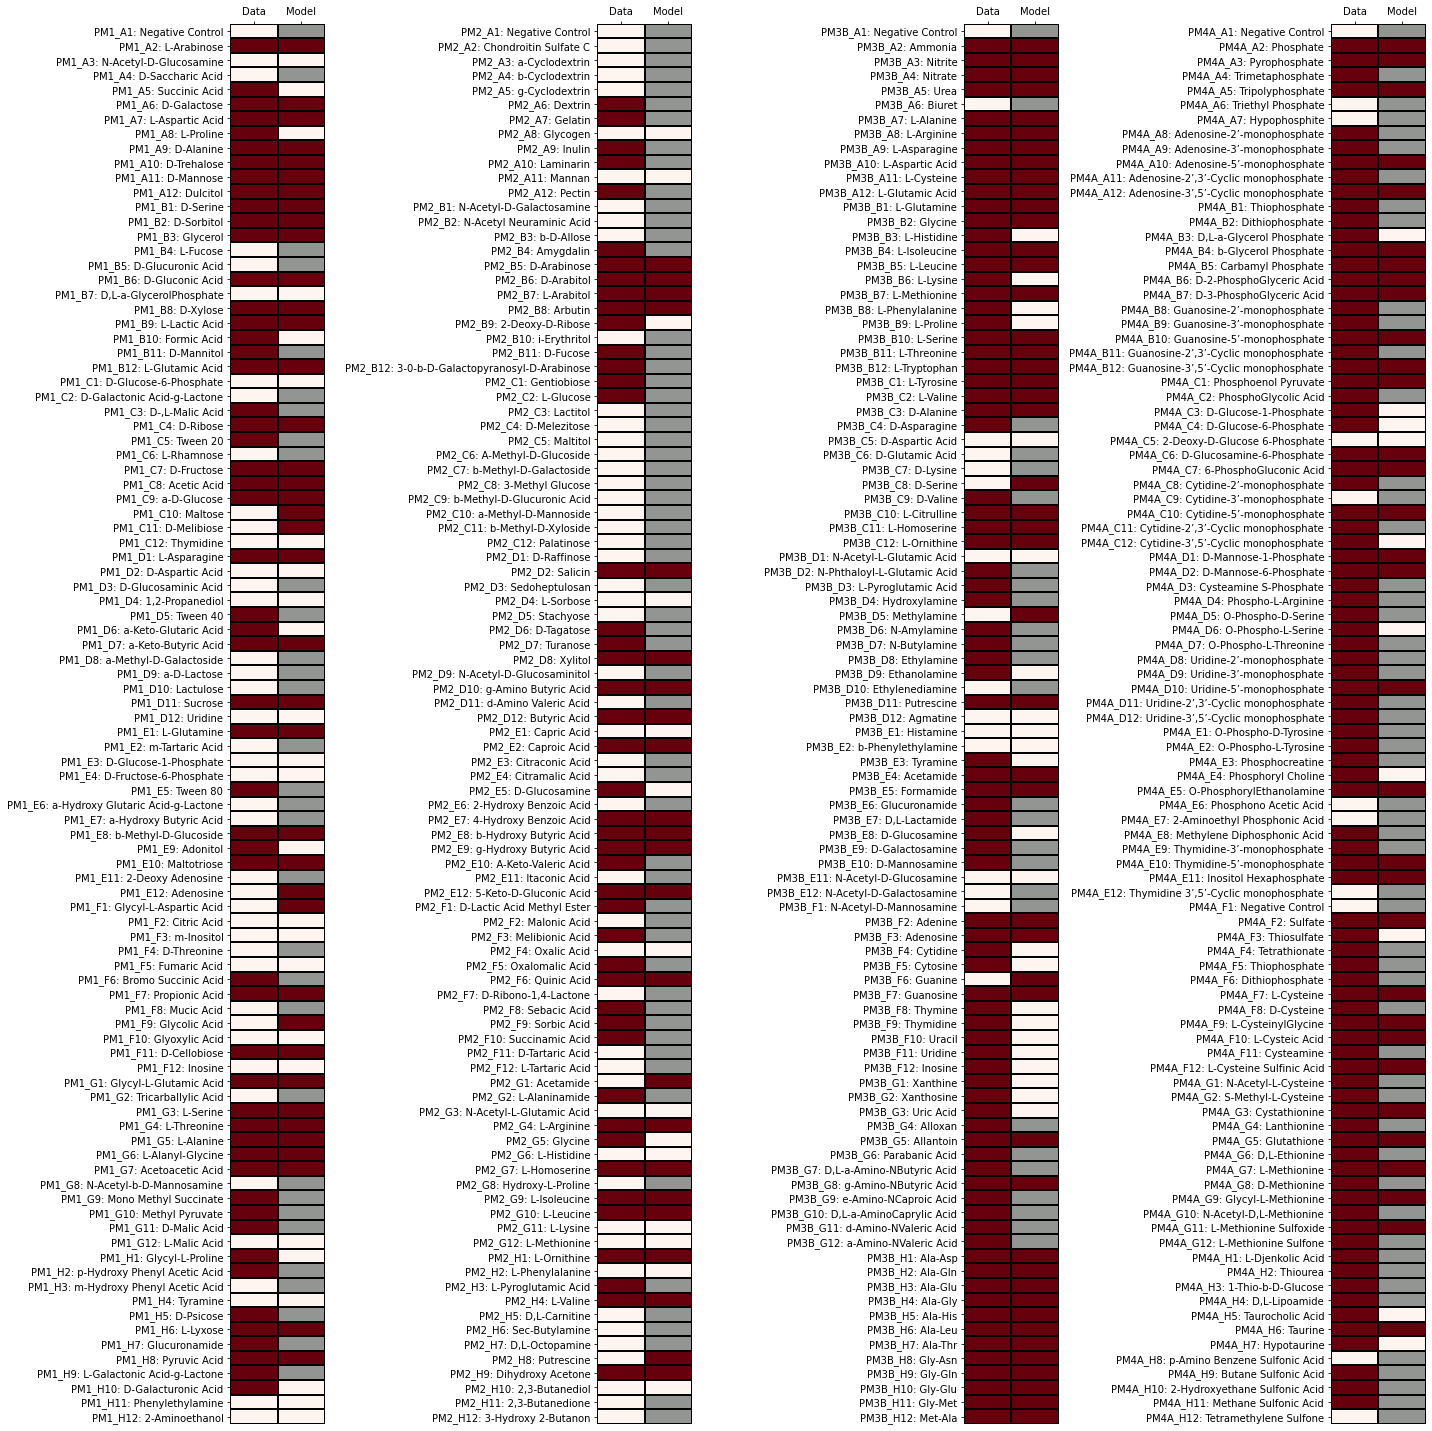

In [69]:
fig, ax = plt.subplots(figsize=(20,20), ncols=4)
sns.heatmap(temp[0:96], linewidths=1, linecolor='black', ax=ax[0], cmap='Reds', cbar=False, mask=temp[0:96].isnull())
sns.heatmap(temp[96:192], linewidths=1, linecolor='black', ax=ax[1], cmap='Reds', cbar=False, mask=temp[96:192].isnull())
sns.heatmap(temp[192:288], linewidths=1, linecolor='black', ax=ax[2], cmap='Reds', cbar=False, mask=temp[192:288].isnull())
sns.heatmap(temp[288:384], linewidths=1, linecolor='black', ax=ax[3], cmap='Reds', cbar=False, mask=temp[288:384].isnull())
ax[0].xaxis.tick_top()
ax[1].xaxis.tick_top()
ax[2].xaxis.tick_top()
ax[3].xaxis.tick_top()
ax[0].set_facecolor('xkcd:grey')
ax[1].set_facecolor('xkcd:grey')
ax[2].set_facecolor('xkcd:grey')
ax[3].set_facecolor('xkcd:grey')
plt.tight_layout()

In [70]:
temp = Biolog_Prediction.pivot_table(index=['PlateType','Row'], columns='Column', values='Data')
temp.style.background_gradient(cmap='Reds', low=0, high=0.5, axis=None).set_precision(2)

In [71]:
temp = Biolog_Prediction.pivot_table(index=['PlateType','Row'], columns='Column', values='Prediction', dropna=False)
temp.style.apply(background_gradient, cmap='RdBu_r', axis=None).highlight_null('lightgrey').set_precision(2)

/Users/kimj972/anaconda3/envs/python3_cobrapy0.17.1/lib/python3.6/site-packages/ipykernel_launcher.py:26 UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


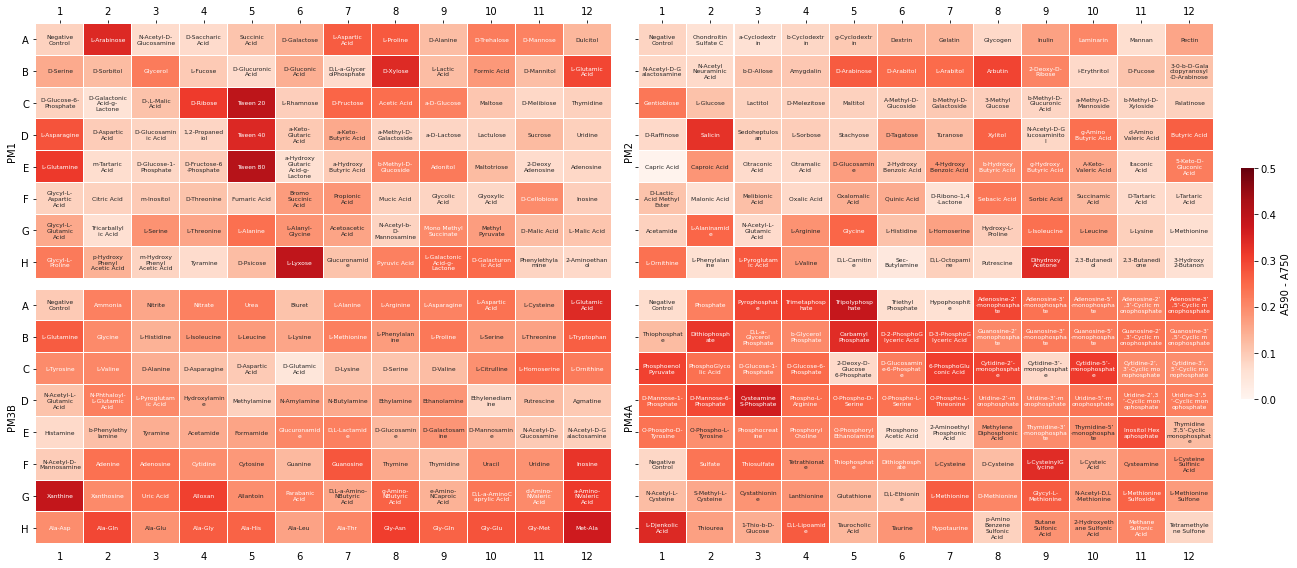

In [72]:
temp = Biolog_Prediction.pivot_table(index=['PlateType','Row'], columns='Column', values='Data')
temp_annot = Biolog.pivot_table(index=['PlateType','Row'], columns='Column', values='Compound',
                                aggfunc=lambda x: ', '.join(x.unique())).apply(lambda x: x.str.wrap(12))

fig, axes = plt.subplots(figsize=(18,8), nrows=2, ncols=2, sharex=True, sharey=True)
cbar_ax = fig.add_axes([.96, .3, .01, .4])
i = 0
j = 0
for k, df in temp.groupby(level=0):
    sns.heatmap(df.droplevel(level=0), annot=temp_annot.loc[k], fmt="", linewidth=0.1, cmap='Reds',
                annot_kws={"fontsize": 6}, vmin=0, vmax=0.5, ax=axes[i,j],
                cbar=(i == 0), cbar_ax=None if i else cbar_ax, cbar_kws={'label': 'A590 - A750'})
    axes[i,j].set_ylabel(k)
    axes[i,j].set_xlabel('')
    if j % 2 == 1:
        i = 1
        j = 0
    else:
        j = j+1
axes[0,0].xaxis.set_ticks_position('top')
axes[0,1].xaxis.set_ticks_position('top')
axes[1,0].xaxis.set_ticks_position('none')
axes[1,1].xaxis.set_ticks_position('none')
axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), rotation=0)
axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0)
plt.tight_layout(rect=[0, 0, .95, 1])
plt.savefig('Biolog.svg', dpi=300)

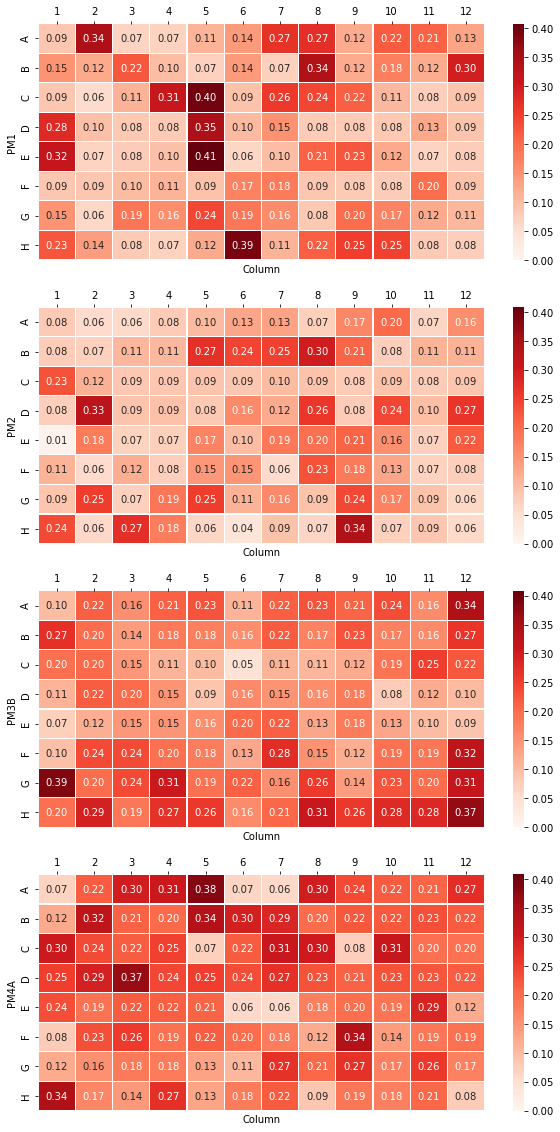

In [73]:
temp = Biolog_Prediction.pivot_table(index=['PlateType','Row'], columns='Column', values='Data')
fig, axes = plt.subplots(figsize=(10,20), nrows=4)
i = 0
for k, df in temp.groupby(level=0):
    sns.heatmap(df.droplevel(level=0), annot=True, fmt="0.2f", linewidth=0.1, cmap='Reds', 
                vmin=0, vmax=temp.max().max(), ax=axes[i])
    axes[i].set_ylabel(k)
    axes[i].xaxis.set_ticks_position('top')
    i = i+1

In [74]:
temp = Biolog_Prediction_Normalized.pivot_table(index=['PlateType','Row'], columns='Column', values='Data')
temp.style.background_gradient(cmap='Reds', low=-0.2, high=0.5, axis=None).set_precision(2)

### Fitness

In [75]:
Fitness_metadata = pd.read_csv('../../Data/Fitness_Extended_Metadata.txt',
                               sep='\t', index_col=[0])
Fitness_metadata

,Media,Format,Temperature,Starting pH,Shaking,StartOD,EndOD,Hours
Condition,,,,,,,,
M9_Glucose,"M9 salts, Trace Elements, 1% Glucose",10 mL in glass test tubes,30.0,7,200,0.1,5.4,72.0
YNB Glucose,"YNB no Amino Acids 6.7 g/L, 2% Glucose",100 mL in 250 mL baffled flask,30.0,approx 7,200 RPM,0.1,~5,12.0
YNB Glucose plus Arginine,"YNB no Amino Acids 6.7 g/L, 2% Glucose, 75 mM ...",100 mL in 250 mL baffled flask,30.0,approx 7,200 RPM,0.1,~5,12.0
YNB Glucose plus Methionine,"YNB no Amino Acids 6.7 g/L, 2% Glucose, 75 mM ...",100 mL in 250 mL baffled flask,30.0,approx 7,200 RPM,0.1,~5,12.0
YNB Glucose plus Dropout Complete,"YNB no Amino Acids 6.7 g/L, 2% Glucose, 0.2% D...",100 mL in 250 mL baffled flask,30.0,approx 7,200 RPM,0.1,~5,12.0
Fitness During Lipid Mobilization,"YNB no Amino Acids or Ammonium Sulfate, 25 mM ...",100 mL in 250 mL baffled flask,30.0,approx 7,200 RPM,0.1,~10,88.0
YNB Oleic Acid,"YNB no Amino Acids 6.7 g/L, 1% Oleic Acid",100 mL in 250 mL baffled flask,30.0,approx 7,200 RPM,0.1,~3,72.0
YNB Cellobiose,"YNB no Amino Acids 6.7 g/L, 2% Cellobiose",50 mL in 250 mL baffled flask,30.0,approx 7,200 RPM,0.1,0.8,108.0
YNB_CSM_KPO4 Glucose,"YNB no Amino Acids 6.7 g/L, Complete Supplemen...",50 mL in 250 mL baffled flask,30.0,6,200 RPM,0.1,11,20.0


In [76]:
# Biotin supplement in YNB
# S. cer VHT1 biotin transporter blasts to 12353 and 12740 H+-pantothenate symporter FEN2
# 12353 essential, 12740 not essential
# VHT1 does not transport pantothenate, FEN2 is not known to transport biotin
# https://www.longdom.org/open-access/mechanisms-of-biotin-transport-2161-1009-1000210.pdf
r1 = sce.reactions.get_by_id('EX_btn_e').copy()
r1.lower_bound = 0.0
r2 = sce.reactions.get_by_id('BTNt2i').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1,r2])
# Folate supplement in YNB
r1 = hsa2.reactions.get_by_id('EX_fol_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('FOLt').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1,r2])
model.metabolites.get_by_id('fol_e').formula = 'C19H17N7O6'
model.metabolites.get_by_id('fol_e').charge = -2
# folate mitochondrial transporter 
# 14159 SLC25A32 - FLX1 yeast mitochondrial FAD transporter, ok assigned to FADFMNtm
# 10961 SLC25A32 - YEA6, YIA6 yeast mitochondrial NAD transporter, missing reaction
# https://www.ncbi.nlm.nih.gov/pubmed/16291748
r = hsa2.reactions.get_by_id('NADtm').copy()
r.gene_reaction_rule = '10961'
r.lower_bound = 0.0
model.add_reactions([r])
# Pyridoxine supplement in YNB
# Diffusion in Recon3D
r1 = hsa2.reactions.get_by_id('EX_pydxn_e').copy()
r1.lower_bound = 0.0
r2 = hsa2.reactions.get_by_id('PYDXNtr').copy()
r2.gene_reaction_rule = ''
model.add_reactions([r1,r2])
# Riboflavin supplement in YNB
# Transport by MCH5 in yeast, by SLC52A1-3 in human
# SLC52A1-3 not found, but many MCH5 homologs - MCH5 blast best hits are 9772 and 9771
r = sce.reactions.get_by_id('RIBFLVt2').copy()
r.gene_reaction_rule = '9771 or 9772'
model.add_reactions([r])
# 11257 Slc16a7 catalyzes the rapid transport across the plasma membrane of many monocarboxylates such as
# lactate, pyruvate, branched-chain oxo acids derived from leucine, valine and isoleucine, and 
# the ketone bodies acetoacetate, beta-hydroxybutyrate and acetate. Functions as high-affinity pyruvate transporter

In [77]:
temp = Annotation.index[Annotation['Sc288 Best Hit'].str.contains('MCH5')]
display(Annotation.loc[temp])

,Combined Annotations,Signal P,Sc288c Orthologs,Human Orthologs,Sc288 Best Hit,Human Blast,Essential,WolfPSort,C Terminal
RTO4_ID,,,,,,,,,
9254,KOG2504: Monocarboxylate transporter,,,,MCH5,,Not Essential,plas 25,QWV*
9771,"K08190: SLC16A14; MFS transporter, MCP family,...",,,,MCH5,SLC16,Not Essential,"plas 24, E.R. 2",PWV*
9772,KOG2504: Monocarboxylate transporter,,,,MCH5,SLC16,Not Essential,plas 27,RWV*
10001,"HMMPfam:Major Facilitator Superfamily:PF07690,...",,,,MCH5,SLC16,Not Essential,"plas 23, mito 3",SVV*
11257,"K08184: SLC16A7; MFS transporter, MCP family, ...",A,,,MCH5,SLC16A,Not Essential,"plas 23, E.R. 3",KKM*
16137,KOG2504: Monocarboxylate transporter,,,,MCH5,,Not Essential,"plas 21, mito 4",ARY*


In [78]:
for x in temp:
    if x in model.genes:
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(r, r.gene_reaction_rule)
    else:
        print(x, 'no reactions')
    print()

9254 no reactions

RIBFLVt2: h_e + ribflv_e --> h_c + ribflv_c 9771 or 9772

RIBFLVt2: h_e + ribflv_e --> h_c + ribflv_c 9771 or 9772

10001 no reactions

2OBUTt: 2obut_e + h_e <=> 2obut_c + h_c 11257
ACACt2: acac_e + h_e <=> acac_c + h_c 11257

16137 no reactions



In [79]:
Fitness = pd.read_csv('../../Data/Fitness_Extended.txt',
                      sep='\t', index_col=[0])
Fitness.head()

,M9_Glucose,YNB Glucose,YNB Glucose plus Arginine,YNB Glucose plus Methionine,YNB Glucose plus Dropout Complete,Fitness During Lipid Mobilization,YNB Oleic Acid,YNB Cellobiose,YNB_CSM_KPO4 Glucose,YNB_CSM_KPO4 Xylose,...,YNB_PO4_D-arabitol,YNB_PO4_L-arabitol,YNB_PO4_xylitol,YNB_PO4_D-ribulose,YNB_PO4_D-xylulose,YNB_PO4_CSM_Galactose,YNB_PO4_CSM_Lactate,YNB_PO4_CSM_Valine,YNB_PO4_CSM_Leucine,YNB_PO4_CSM_Phenylalanine
NearestGene,,,,,,,,,,,,,,,,,,,,,
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,0.470687,NaN,NaN,NaN,NaN,NaN,0.355042,-1.380790,0.232644,-0.611164,...,-0.058498,NaN,-0.173179,NaN,NaN,0.805186,-0.305508,-1.859958,0.478936,NaN
10002,0.283788,0.038678,0.172165,0.063986,0.265484,0.090129,0.037532,-0.219215,-0.610762,-0.284108,...,0.158657,-0.020557,-0.202506,0.005331,0.172014,0.420393,-0.879143,0.209051,0.048033,0.510014
10003,-0.030815,-0.411329,-0.366240,-0.373962,-0.535817,-0.213208,-0.241435,0.042549,-0.069536,-0.283891,...,-0.299174,-0.374318,-0.240221,-0.231199,0.032861,-0.268949,-0.249481,-0.722290,-0.262344,-0.712309
10004,-0.071440,-0.088858,-0.191260,-0.096023,-0.159386,-0.203134,-0.045141,-0.009610,0.068061,-0.033638,...,0.149967,0.053322,0.003410,0.189365,0.237623,-0.058611,0.193184,0.089955,0.166444,0.246537


In [80]:
YNB = ['EX_nh4_e','EX_btn_e','EX_pnto__R_e','EX_fol_e','EX_nac_e','EX_4abz_e','EX_pydxn_e','EX_thm_e']
DOC = ['EX_ala__L_e','EX_arg__L_e','EX_asn__L_e','EX_asp__L_e','EX_cys__L_e','EX_gln__L_e','EX_glu__L_e','EX_gly_e',
      'EX_his__L_e','EX_ile__L_e','EX_leu__L_e','EX_lys__L_e','EX_met__L_e','EX_phe__L_e','EX_pro__L_e','EX_ser__L_e',
      'EX_thr__L_e','EX_trp__L_e','EX_tyr__L_e','EX_val__L_e','EX_ade_e','EX_ura_e','EX_4abz_e','EX_inost_e']
CSM = ['EX_ade_e','EX_arg__L_e','EX_asp__L_e','EX_his__L_e','EX_ile__L_e','EX_leu__L_e','EX_lys__L_e','EX_met__L_e',
       'EX_phe__L_e','EX_thr__L_e','EX_trp__L_e','EX_tyr__L_e','EX_val__L_e','EX_ura_e']
Fitness_Media = {'M9_Glucose': ['EX_glc__D_e','EX_nh4_e'],
                 'YNB Glucose': ['EX_glc__D_e']+YNB,
                 'YNB Glucose plus Arginine': ['EX_glc__D_e','EX_arg__L_e']+YNB,
                 'YNB Glucose plus Methionine': ['EX_glc__D_e','EX_met__L_e']+YNB,
                 'YNB Glucose plus Dropout Complete': ['EX_glc__D_e']+YNB+DOC,
                 'Fitness During Lipid Mobilization': ['SK_triglyc_RT_d']+YNB,
                 'YNB Oleic Acid': ['EX_ocdcea_e']+YNB,
                 'YNB Cellobiose': ['EX_cellb_e']+YNB,
                 'YNB_CSM_KPO4 Glucose': ['EX_glc__D_e']+YNB+CSM,
                 'YNB_CSM_KPO4 Xylose': ['EX_xyl__D_e']+YNB+CSM,
                 'YNB_CSM_KPO4 Arabinose': ['EX_arab__L_e']+YNB+CSM,
                 'YNB_CSM_KPO4 Acetate': ['EX_ac_e']+YNB+CSM,
                 'YNB_CSM_KPO4 p-Coumarate': ['EX_T4hcinnm_e']+YNB+CSM,
                 'YNB_CSM_KPO4 Ferulate': ['EX_fer_e']+YNB+CSM,
                 'YNB_PO4_CSM_Phenylalanine': ['EX_phe__L_e']+YNB+CSM,
                 'YNB_PO4_Benzoate': ['EX_bz_e']+YNB,
                 'YNB_PO4_Mannose': ['EX_man_e']+YNB,
                 'YNB_PO4_L-lyxose': ['EX_lyx__L_e']+YNB,
                 'YNB_PO4_D-arabitol': ['EX_abt__D_e']+YNB,
                 'YNB_PO4_L-arabitol': ['EX_abt_e']+YNB,
                 'YNB_PO4_xylitol': ['EX_xylt_e']+YNB,
                 'YNB_PO4_D-ribulose': ['EX_rbl__D_e']+YNB,
                 'YNB_PO4_D-xylulose': ['EX_xylu__D_e']+YNB,
                 'YNB_PO4_CSM_Galactose': ['EX_gal_e']+YNB+CSM,
                 'YNB_PO4_CSM_Lactate': ['EX_lac__D_e','EX_lac__L_e']+YNB+CSM,
                 'YNB_PO4_CSM_Valine': ['EX_val__L_e']+YNB+CSM,
                 'YNB_PO4_CSM_Leucine': ['EX_leu__L_e']+YNB+CSM}

In [81]:
model.medium

{'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_glc__D_e': 1.0,
 'EX_ca2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_zn2_e': 1000.0}

Use uptake rate of -1000.0 for metabolites in YNB, they are not growth limiting  
Use uptake rate of -1.0 for main carbon sources, and -0.01 for supplements    
Use uptake rate of -0.01 for metabolites in DOC or CSM, they are supplements in small amount  
Use lipid mobilization rate of -0.001 to account for the high molecular weight  

In [82]:
Growth_Prediction_All = pd.DataFrame()
with model:
    model.reactions.get_by_id('ATPM').lower_bound = 0.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    for k, v in Fitness_Media.items():
        for x in v:
            if x in YNB:
                model.reactions.get_by_id(x).lower_bound = -1000.0
            elif x in DOC or x in CSM:
                if v.index(x) == 0:
                    model.reactions.get_by_id(x).lower_bound = -1.0
                else:
                    model.reactions.get_by_id(x).lower_bound = -0.01
            elif x == 'SK_triglyc_RT_d':
                model.reactions.get_by_id(x).lower_bound = -0.001
            else:
                model.reactions.get_by_id(x).lower_bound = -1.0
        temp = cobra.flux_analysis.single_gene_deletion(model)
        for x in v:
            model.reactions.get_by_id(x).lower_bound = 0.0
        Growth_Prediction_All[k] = temp['growth']

In [83]:
Growth_Prediction_All.index = [list(x)[0] for x in Growth_Prediction_All.index]

In [84]:
print('Genes with fitness score:', len(Fitness))
print('Model genes:', len(Growth_Prediction_All))
print('Model genes excluding mitochondrial and unknown:', len([x for x in Growth_Prediction_All.index if x[0].isdigit()]))

Genes with fitness score: 8345
Model genes: 1147
Model genes excluding mitochondrial and unknown: 1132


In [85]:
[x for x in Growth_Prediction_All.index if not x[0].isdigit()]

['COX1',
 'NAD4L',
 'ATP9',
 'NAD4',
 'NAD1',
 'NAD2',
 'NAD6',
 'COPII',
 'COB',
 'COX3',
 'NAD3',
 'ATP8',
 'NAD5',
 'ATP6',
 'COX2']

In [86]:
genes_with_fitness = set(Growth_Prediction_All.index).intersection(Fitness.index)
print('Model genes with fitness score:', len(genes_with_fitness))
genes_without_fitness = set(x.id for x in model.genes if x.id not in genes_with_fitness and x.id[0].isdigit())
print('Model genes without fitness score:', len(genes_without_fitness))
temp = sorted(list(genes_with_fitness.union(genes_without_fitness)))
print('Model genes that can be simulated:', len(temp))

Model genes with fitness score: 1116
Model genes without fitness score: 16
Model genes that can be simulated: 1132


In [87]:
Growth_Data = Fitness.reindex(index=temp, columns=Growth_Prediction_All.columns)
Growth_Prediction = Growth_Prediction_All.loc[temp]
display(Growth_Data.head().style.background_gradient(cmap='RdBu_r', axis=None).highlight_null('lightgrey'))
display(Growth_Prediction.head().style.background_gradient(cmap='RdBu_r', axis=None))

,M9_Glucose,YNB Glucose,YNB Glucose plus Arginine,YNB Glucose plus Methionine,YNB Glucose plus Dropout Complete,Fitness During Lipid Mobilization,YNB Oleic Acid,YNB Cellobiose,YNB_CSM_KPO4 Glucose,YNB_CSM_KPO4 Xylose,YNB_CSM_KPO4 Arabinose,YNB_CSM_KPO4 Acetate,YNB_CSM_KPO4 p-Coumarate,YNB_CSM_KPO4 Ferulate,YNB_PO4_CSM_Phenylalanine,YNB_PO4_Benzoate,YNB_PO4_Mannose,YNB_PO4_L-lyxose,YNB_PO4_D-arabitol,YNB_PO4_L-arabitol,YNB_PO4_xylitol,YNB_PO4_D-ribulose,YNB_PO4_D-xylulose,YNB_PO4_CSM_Galactose,YNB_PO4_CSM_Lactate,YNB_PO4_CSM_Valine,YNB_PO4_CSM_Leucine
NearestGene,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10007,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10010,-0.130360,-0.558565,-0.332740,-0.260252,-0.383313,-0.030872,-0.611898,-0.097438,-0.035705,-0.405832,-0.077257,-0.114424,-2.825808,-0.313043,-0.376989,-1.005593,-0.068720,-0.902581,-0.966503,-0.732452,-0.836823,-0.490688,-0.534801,-0.035402,-0.427705,-0.143231,-0.240726
10012,0.120928,-0.056685,-0.143451,-0.205516,-0.240177,-0.282986,-0.039371,0.021825,-0.185444,0.247584,-0.357236,-0.279080,-0.284744,-0.191232,-0.586259,0.419109,0.055791,-0.243860,0.006924,-0.185901,-0.347117,-0.043478,0.049640,-0.330369,-0.571357,-0.390520,-4.921371
10017,-0.117902,0.001326,0.216430,0.169223,-0.072431,0.382748,0.455964,0.161420,0.012681,0.187815,0.037770,0.028149,-0.167706,-0.147833,-0.086100,0.326169,-0.004083,-0.188072,-0.253541,0.073421,0.076093,-0.266397,0.038548,0.024525,0.112220,-0.159979,-0.229817


,M9_Glucose,YNB Glucose,YNB Glucose plus Arginine,YNB Glucose plus Methionine,YNB Glucose plus Dropout Complete,Fitness During Lipid Mobilization,YNB Oleic Acid,YNB Cellobiose,YNB_CSM_KPO4 Glucose,YNB_CSM_KPO4 Xylose,YNB_CSM_KPO4 Arabinose,YNB_CSM_KPO4 Acetate,YNB_CSM_KPO4 p-Coumarate,YNB_CSM_KPO4 Ferulate,YNB_PO4_CSM_Phenylalanine,YNB_PO4_Benzoate,YNB_PO4_Mannose,YNB_PO4_L-lyxose,YNB_PO4_D-arabitol,YNB_PO4_L-arabitol,YNB_PO4_xylitol,YNB_PO4_D-ribulose,YNB_PO4_D-xylulose,YNB_PO4_CSM_Galactose,YNB_PO4_CSM_Lactate,YNB_PO4_CSM_Valine,YNB_PO4_CSM_Leucine
10000,0.075763,0.075961,0.076815,0.077491,0.096124,0.085168,0.257937,0.151923,0.091300,0.077833,0.077833,0.023544,0.096940,0.048618,0.007028,0.047933,0.075961,0.063301,0.067460,0.067460,0.067460,0.063301,0.063301,0.091300,0.075805,0.081519,0.096762
10007,0.074169,0.074360,0.075155,0.075789,0.093805,0.085585,0.259253,0.148719,0.089184,0.075961,0.075961,0.024133,0.096026,0.049045,0.006890,0.048049,0.074360,0.061966,0.066132,0.066132,0.066132,0.061966,0.061966,0.089184,0.075731,0.081503,0.096491
10010,0.066110,0.066270,0.067092,0.067496,0.084007,0.072205,0.216104,0.132540,0.079559,0.067648,0.067648,0.017800,0.084590,0.036073,0.005985,0.043659,0.066270,0.055225,0.059959,0.059959,0.059959,0.055225,0.055225,0.079559,0.067189,0.070366,0.084595
10012,0.075763,0.075961,0.076815,0.077491,0.096124,0.085585,0.259253,0.151923,0.091300,0.077833,0.077833,0.024259,0.097926,0.049847,0.006229,0.048517,0.075961,0.063301,0.067460,0.067460,0.067460,0.063301,0.063301,0.091300,0.076995,0.075973,0.006229
10017,0.066110,0.066270,0.067092,0.067496,0.084007,0.072205,0.216104,0.132540,0.079559,0.067648,0.067648,0.017800,0.084590,0.036073,0.005985,0.043659,0.066270,0.055225,0.059959,0.059959,0.059959,0.055225,0.055225,0.079559,0.067189,0.070366,0.084595


In [88]:
print(Growth_Data.shape)
print(Growth_Prediction.shape)

(1132, 27)
(1132, 27)


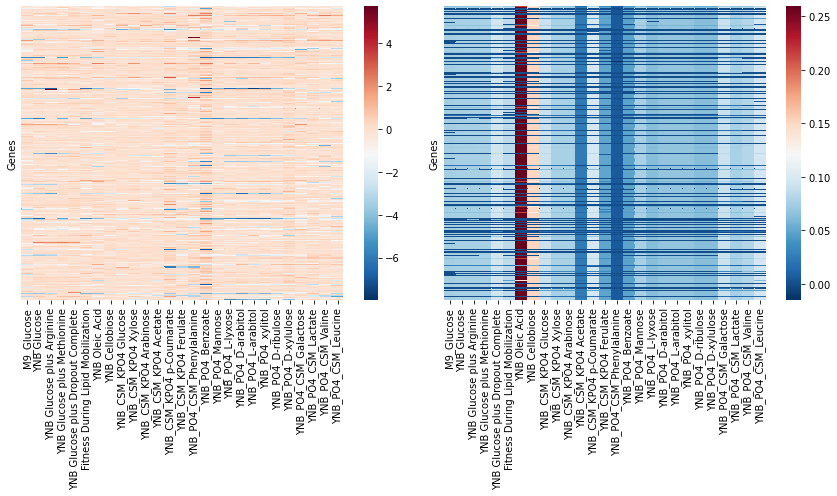

In [89]:
fig, ax = plt.subplots(figsize=(12,7), ncols=2)
sns.heatmap(Growth_Data, ax=ax[0], cmap='RdBu_r', xticklabels=True, yticklabels=False, mask=Growth_Data.isnull())
sns.heatmap(Growth_Prediction, ax=ax[1], cmap='RdBu_r', xticklabels=True, yticklabels=False)
ax[0].set_ylabel('Genes')
ax[1].set_ylabel('Genes')
plt.tight_layout()

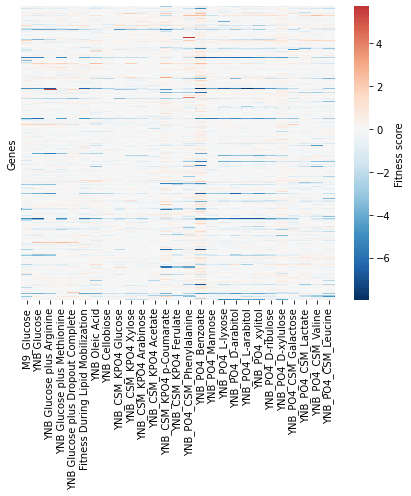

In [90]:
fig, ax = plt.subplots(figsize=(6,7), ncols=1)
sns.heatmap(Growth_Data, ax=ax, cmap='RdBu_r', xticklabels=True, yticklabels=False, mask=Growth_Data.isnull(),
            cbar_kws={'label': 'Fitness score'}, center=0)
ax.set_ylabel('Genes')
plt.tight_layout()
plt.savefig("Fitness.svg", dpi=300)

In [91]:
Essential_genes = pd.read_csv('../../Data/eLife_essential_genes.txt',
                              sep='\t', index_col=0)
Essential_genes.index = Essential_genes.index.map(str)
Essential_genes.head()

,Essential
Protein ID,
15174,Yes
15278,Yes
16786,Yes
14470,Yes
16628,Yes


In [92]:
y_data = ~(Growth_Data < -4)
y_data.loc[Growth_Data.index[Essential_genes.loc[Growth_Data.index,'Essential'] == 'Yes']] = False
y_pred = Growth_Prediction > 0.01*Growth_Prediction.max()

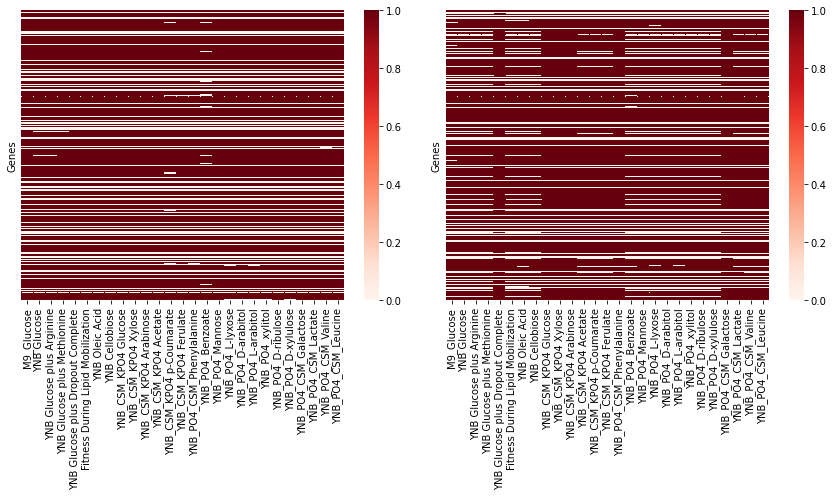

In [93]:
fig, ax = plt.subplots(figsize=(12,7), ncols=2)
sns.heatmap(y_data, ax=ax[0], cmap='Reds', xticklabels=True, yticklabels=False, mask=y_data.isnull())
sns.heatmap(y_pred, ax=ax[1], cmap='Reds', xticklabels=True, yticklabels=False)
ax[0].set_ylabel('Genes')
ax[1].set_ylabel('Genes')
plt.tight_layout()

In [94]:
TN, FP, FN, TP = confusion_matrix(y_data.values.ravel(), y_pred.values.ravel()).ravel()
print(TN, FP, FN, TP, sum([TN, FP, FN, TP]))
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Matthew's
MCC = matthews_corrcoef(y_data.values.ravel(), y_pred.values.ravel())
print('Recall:', TPR.round(3))
print('Precision:', PPV.round(3))
print('Accuracy:', ACC.round(3))
print('Matthew\'s correlation:', MCC.round(3))

3430 4350 2549 20235 30564
Recall: 0.888
Precision: 0.823
Accuracy: 0.774
Matthew's correlation: 0.361


In [95]:
df_confusion = pd.DataFrame(confusion_matrix(y_data.values.ravel(), y_pred.values.ravel()),
                            index = pd.MultiIndex.from_product([['Experiment'],['No growth', 'Growth']]),
                            columns = pd.MultiIndex.from_product([['Prediction'],['No growth', 'Growth']]))
df_confusion

Prediction       
                      No growth Growth
Experiment No growth       3430   4350
           Growth          2549  20235

In [96]:
TN, FP, FN, TP = (confusion_matrix(y_data.values.ravel(), y_pred.values.ravel()).ravel()/y_data.shape[1]).round()
print(TN, FP, FN, TP, sum([TN, FP, FN, TP]))
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Matthew's
MCC = matthews_corrcoef(y_data.values.ravel(), y_pred.values.ravel())
print('Recall:', TPR.round(3))
print('Precision:', PPV.round(3))
print('Accuracy:', ACC.round(3))
print('Matthew\'s correlation:', MCC.round(3))

127.0 161.0 94.0 749.0 1131.0
Recall: 0.888
Precision: 0.823
Accuracy: 0.775
Matthew's correlation: 0.361


In [97]:
df_confusion = pd.DataFrame((confusion_matrix(y_data.values.ravel(), y_pred.values.ravel())/y_data.shape[1]).round(),
                            index = pd.MultiIndex.from_product([['Experiment'],['No growth', 'Growth']]),
                            columns = pd.MultiIndex.from_product([['Prediction'],['No growth', 'Growth']]))
df_confusion

Prediction       
                      No growth Growth
Experiment No growth      127.0  161.0
           Growth          94.0  749.0

In [98]:
thresholds = np.arange(-7, 0, 0.1)
TPR = {}
FPR = {}
ACC = {}
MCC = {}
for x in thresholds:
    
    y_data = ~(Growth_Data < x)
    y_data.loc[Growth_Data.index[Essential_genes.loc[Growth_Data.index,'Essential'] == 'Yes']] = False
    y_pred = Growth_Prediction > 0.01*Growth_Prediction.max()
    TN, FP, FN, TP = confusion_matrix(y_data.values.ravel(), y_pred.values.ravel()).ravel()
    # Sensitivity, hit rate, recall, or true positive rate
    TPR[x] = TP/(TP+FN)
    # Fall out or false positive rate
    FPR[x] = FP/(FP+TN)
    # Overall accuracy
    ACC[x] = (TP+TN)/(TP+FP+FN+TN)
    # Matthew's
    MCC[x] = matthews_corrcoef(y_data.values.ravel(), y_pred.values.ravel())

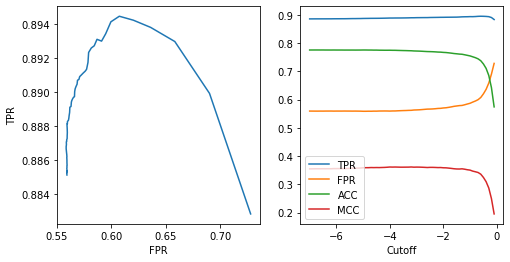

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].plot(list(FPR.values()),list(TPR.values()))
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')

axes[1].plot(thresholds,list(TPR.values()))
axes[1].plot(thresholds,list(FPR.values()))
axes[1].plot(thresholds,list(ACC.values()))
axes[1].plot(thresholds,list(MCC.values()))
axes[1].set_xlabel('Cutoff')
axes[1].legend(['TPR','FPR','ACC','MCC'])

plt.show()

In [100]:
print(thresholds[np.argmax(list(TPR.values()))])
print(thresholds[np.argmin(list(FPR.values()))])
print(thresholds[np.argmax(list(ACC.values()))])
print(thresholds[np.argmax(list(MCC.values()))])

-0.6000000000000227
-4.9000000000000075
-6.800000000000001
-3.2000000000000135


In [101]:
for x in Growth_Prediction.index:
    if Growth_Prediction.loc[x,'YNB Glucose'] > 1e-6 and not Growth_Data.loc[x,'YNB Glucose'] > -3:
        print(x, Annotation.loc[x,'Combined Annotations'])
        print(Growth_Prediction.loc[x,'YNB Glucose'], Growth_Data.loc[x,'YNB Glucose'])
        print(' Model')
        for r in sorted(model.genes.get_by_id(x).reactions, key=lambda x: x.id):
            print(' ', r, r.gene_reaction_rule)
        print()

10000 K00036: G6PD, zwf; glucose-6-phosphate 1-dehydrogenase
0.07596130136997142 nan
 Model
  G6PDH2r: g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c 10000
  G6PDH2rp: g6p_x + nadp_x <=> 6pgl_x + h_x + nadph_x 10000

10007 K00164: OGDH, sucA; 2-oxoglutarate dehydrogenase E1 component
0.07435968324826536 nan
 Model
  AKGDm: akg_m + coa_m + nad_m --> co2_m + nadh_m + succoa_m 10007 and 10040 and 12116

10095 K03843: ALG2; alpha-1,3/alpha-1,6-mannosyltransferase
0.07596130137114704 nan
 Model
  G13MT_L: gdpmann_c + 0.1 mpdol__L_c --> gdp_c + h_c + 0.1 m1mpdol__L_c 10095
  G13MT_U: gdpmann_c + 0.1 mpdol_U_c --> gdp_c + h_c + 0.1 m1mpdol_U_c 10095

10173 K00616: E2.2.1.2, talA, talB; transaldolase
0.07571403578180025 nan
 Model
  TALA: g3p_c + s7p_c <=> e4p_c + f6p_c 10173

10197 K20238: E2.1.1.317; sphingolipid C9-methyltransferase
0.07596130136997237 nan
 Model
  CERMT618er: amet_r + cer5_18_r --> ahcys_r + cer6_18_r + h_r 10197

10293 K13239: PECI; peroxisomal 3,2-trans-enoyl-CoA isomerase
0.

0.07587294325881833 nan
 Model
  GLU5K: atp_c + glu__L_c --> adp_c + glu5p_c 15188

15248 K00641: metX; homoserine O-acetyltransferase
0.07596130136996944 -3.084081837506256
 Model
  HSERTA: accoa_c + hom__L_c <=> achms_c + coa_c 12513 or 15248

15287 K07556: ATPeAF2, ATPAF2, ATP12; ATP synthase mitochondrial F1 complex assembly factor 2
0.01931879082802085 nan
 Model
  ATPS3m: adp_m + 3.0 h_c + pi_m --> atp_m + h2o_m + 2.0 h_m ATP6 and ATP8 and ATP9 and 9080 and 9619 and 9940 and 10674 and 11958 and 11967 and 13053 and 13252 and 13424 and 13759 and 13842 and 14786 and 14912 and 15287 and 15589 and 15880 and 16359

15309 K02154: ATPeV0A, ATP6N; V-type H+-transporting ATPase subunit a
0.07596130137289103 nan
 Model
  ATPS2v: atp_c + h2o_c + h_c --> adp_c + 2.0 h_v + pi_c 10802 and 11025 and 11052 and 11064 and 11117 and 11403 and 14971 and 15309 and 15351 and 15963 and 16397 and 9210 and 9622 and 9748

15339 K03671: trxA; thioredoxin 1
0.07596130136745266 nan
 Model
  METSOXR1: metsox_S

In [102]:
# 8959 is Lengsin, Glutamate-ammonia ligase domain-containing protein 1 or Lens glutamine synthase-like
model.reactions.get_by_id('GLNS').gene_reaction_rule = '11844'
# 14762 is Asparagine synthetase domain-containing protein 1
model.reactions.get_by_id('ASNS1').gene_reaction_rule = '15137'
# PRPS https://bmcbiotechnol.biomedcentral.com/articles/10.1186/1472-6750-8-67
# Thus, in S. cerevisiae PRPP synthetase is organized in two interacting complexes or functional entities: 
# a heterodimer comprising Prs1p-Prs3p; and a heterotrimer consisting of Prs2p-Prs4p-Prs5p [15].
# 11145 and 16592 are both essential, they could be forming a heterodimer
# 11145	K00948: PRPS, prsA; ribose-phosphate pyrophosphokinase		PRS4,PRS2,PRS3	PRPS1,PRPS1L1,PRPS2	PRS3	PRPS2	Essential	mito 20, cyto 5	VVR*
# 16592	K00948: PRPS, prsA; ribose-phosphate pyrophosphokinase		PRS4,PRS2,PRS3	PRPS1,PRPS1L1,PRPS2	PRS2	PRPS1	Essential	cyto 13, cyto_nucl 10.333, cyto_pero 7.333, mito 7, nucl 6.5	LFK*
model.reactions.get_by_id('PRPPS').gene_reaction_rule = '11145 and 16592'
# ERG26 8835 is right size, 13724 is much longer at the C-terminus, RNA data suggests two transcripts for 13724
model.reactions.get_by_id('C3STDH1Pr').gene_reaction_rule = '8835'
model.reactions.get_by_id('C3STDH1r').gene_reaction_rule = '8835'
model.reactions.get_by_id('C3STDH2er').gene_reaction_rule = '8835'
# 8878 is PPCS/CAB2 (ATP eukaryotic and CTP prokaryotic), 8536 is PPCDC/CAB3
# PPNCL is incorrect
model.remove_reactions(['PPNCL','PPNCL2'], remove_orphans=True)
# CSm is essential without CITtp
# Remove CITtp (added in Refinement_1a_Duplicate_Metabolites)
# ICITtp is needed for growth on fatty acids
model.remove_reactions(['CITtp'], remove_orphans=True)
# AKGDm can be made essential if SUCOASm is irreversible in the reverse direction (normal TCA cycle direction)
# and OCOAT1m is irreversible in the forward direction (consistent with metacyc description for its function)
# but both SUCOASm and OCOAT1m are reversible in metacyc
model.reactions.get_by_id('OCOAT1m').lower_bound = 0.0
model.reactions.get_by_id('SUCOASm').upper_bound = 0.0
# GALUi is essential if UGLT is irreversible in the forward direction
model.reactions.get_by_id('UGLT').lower_bound = 0.0
# 11610 is HIS6 (PRMICI) and 9084 is HIS7 (IG3PS)
model.reactions.get_by_id('PRMICI').gene_reaction_rule = '11610'
# 14626 and 9689 are both ILV3, but only 9689 is essential
# In A. fumigatus, there are two ILV3, Ilv3A (essential) and Ilv3B (not essential)
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0043559
# It is not clear what Ilv3B's role is, remove it for now
model.reactions.get_by_id('DHAD1m').gene_reaction_rule = '9689'
model.reactions.get_by_id('DHAD2m').gene_reaction_rule = '9689'
# 16404 BPL1 acts on many biotin-dependent carboxylases including acetyl-CoA-carboxylase, pyruvate carboxylase,
# propionyl CoA carboxylase, and 3-methylcrotonyl CoA carboxylase.
model.reactions.get_by_id('ACCOAC').gene_reaction_rule = '8639 and 16404'
model.reactions.get_by_id('PC').gene_reaction_rule = '16630 and 16404'
model.reactions.get_by_id('MCCCrm').gene_reaction_rule = '12867 and 15694 and 16404'
model.reactions.get_by_id('UREASE').gene_reaction_rule = '9326 and 16404'
# 12551 RIB1 is GTP cyclohydrolase, but 16666 RIB3 is 3,4-dihydroxy 2-butanone 4-phosphate synthase
# A main difference between the fungal and bacterial/plant pathways (see flavin biosynthesis I (bacteria and plants)) 
# is in the order in which two of the enzymes act. Two enzymatic steps are required to convert 
# 2,5-diamino-6-(5-phospho-D-ribosylamino)pyrimidin-4(3H)-one to 5-amino-6-(5-phospho-D-ribitylamino)uracil -
# a demaination and a reduction. In bacteria and plants, the deaminase acts first, followed by the reductase 
# (although both steps are catalyzed by a single bifunctional enzyme in some organisms), 
# while in fungi the reductase acts first, followed by the deaminase.
# 25dhpp_c (GTPCII) and 25drapp_c (GTPCII2) are the same
# 25dhpp_c is converted to 25dthpp_c by 16837 RIB7 reductase, and converted to 5apru_c by RIB2 deaminase
# metacyc reaction is using NADH, but model has DROPPRy (NADPH), add DROPPRx from BiGG
# 12663 is K15454: PUS9; tRNA pseudouridine synthase 9, not RIB2
# 15506 is K14655: RIB2, PUS8; tRNA pseudouridine synthase 8 / 2,5-diamino-6-(5-phospho-D-ribitylamino)-pyrimidin-4(3H)-one deaminase
# GTPCII2, DHPPDA/DHPPDA2, APRAUR is bacterial
r = model.reactions.get_by_id('DROPPRy')
r.id = 'DROPPRx'
r.name = '2 5 diamino 6 ribosylamino 4 3H pyrimidinone 5 phosphate reductase nadh'
r.add_metabolites({'nadph_c': 1.0, 'nadp_c': -1.0, 'nadh_c': -1.0, 'nad_c': 1.0})
model.reactions.get_by_id('GTPCII').gene_reaction_rule = '12551'
model.reactions.get_by_id('DRTPPD').gene_reaction_rule = '15506'
model.remove_reactions(['GTPCII2','DHPPDA','DHPPDA2','APRAUR'], remove_orphans=True)
# 10964 is GMPPA and 14956 is GMPPB/PSA1, UniProt states GMPPA may serve as a regulatory subunit and 
# allow allosteric feedback inhibition of GMPPB by GDP-mannose
# remove G1PTT and MAN1PT2
model.reactions.get_by_id('MAN1PT').gene_reaction_rule = '14956'
model.remove_reactions(['G1PTT','MAN1PT2'], remove_orphans=True)
# GLCNACT is by 13348 ALG13 and 14170 ALG14
model.reactions.get_by_id('GLCNACT').gene_reaction_rule = '13348 and 14170'
# Three carbonic anhydrases ['16143','12581','10985']
# Add HCO3En with 16143, change HCO3Em to 10985
model.reactions.get_by_id('HCO3Em').gene_reaction_rule = '10985'
# PYDXS is incorrect, replace ru5p__D_c with r5p_c
# https://metacyc.org/META/NEW-IMAGE?type=REACTION&object=RXN-11322
model.reactions.get_by_id('PYDXS').add_metabolites({'ru5p__D_c': 1.0, 'r5p_c': -1.0})
# 9830 is Cytochrome c1 heme lyase; involved in maturation of cytochrome c1, which is a subunit of 
# the mitochondrial ubiquinol-cytochrome-c reductase, CYOR_u9m
model.reactions.get_by_id('CYOR_u9m').gene_reaction_rule = 'COB and 9705 and 9198 and 11618 and 15758 and 15681 and 12966 and 15231 and 13608 and 13614 and 8802 and 9830'
# 14856 is essential for making 2oxoadp_m, HCITSm is essential if AMCOXO is removed
# check if AM6SAD and AMCOXO are reasonable (Refinement_2a_Add_Biomass_Reaction)
# https://metacyc.org/META/NEW-IMAGE?type=PATHWAY&object=PWY-5652&&detail-level=2&ENZORG=NIL
# In any case, HICITDm is irreversible
model.reactions.get_by_id('HICITDm').lower_bound = 0.0

print('Removed genes', [g.id for g in model.genes if not g.reactions])
cobra.manipulation.remove_genes(model, [g.id for g in model.genes if not g.reactions])

Removed genes ['13724', '14626', '12663', '14762', '14831', '14828']


In [103]:
Growth_Prediction_All = pd.DataFrame()
with model:
    model.reactions.get_by_id('ATPM').lower_bound = 0.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = 0.0
    for k, v in Fitness_Media.items():
        for x in v:
            if x in YNB:
                model.reactions.get_by_id(x).lower_bound = -1000.0
            elif x in DOC or x in CSM:
                if v.index(x) == 0:
                    model.reactions.get_by_id(x).lower_bound = -1.0
                else:
                    model.reactions.get_by_id(x).lower_bound = -0.01
            elif x == 'SK_triglyc_RT_d':
                model.reactions.get_by_id(x).lower_bound = -0.001
            else:
                model.reactions.get_by_id(x).lower_bound = -1.0
        temp = cobra.flux_analysis.single_gene_deletion(model)
        for x in v:
            model.reactions.get_by_id(x).lower_bound = 0.0
        Growth_Prediction_All[k] = temp['growth']

In [104]:
Growth_Prediction_All.index = [list(x)[0] for x in Growth_Prediction_All.index]

In [105]:
print('Genes with fitness score:', len(Fitness))
print('Model genes:', len(Growth_Prediction_All))
print('Model genes excluding mitochondrial and unknown:', len([x for x in Growth_Prediction_All.index if x[0].isdigit()]))

Genes with fitness score: 8345
Model genes: 1142
Model genes excluding mitochondrial and unknown: 1127


In [106]:
genes_with_fitness = set(Growth_Prediction_All.index).intersection(Fitness.index)
print('Model genes with fitness score:', len(genes_with_fitness))
genes_without_fitness = set(x.id for x in model.genes if x.id not in genes_with_fitness and x.id[0].isdigit())
print('Model genes without fitness score:', len(genes_without_fitness))
temp = sorted(list(genes_with_fitness.union(genes_without_fitness)))
print('Model genes that can be simulated:', len(temp))

Model genes with fitness score: 1111
Model genes without fitness score: 16
Model genes that can be simulated: 1127


In [107]:
Growth_Data = Fitness.reindex(index=temp, columns=Growth_Prediction_All.columns)
Growth_Prediction = Growth_Prediction_All.loc[temp]

In [108]:
print(Growth_Data.shape)
print(Growth_Prediction.shape)

(1127, 27)
(1127, 27)


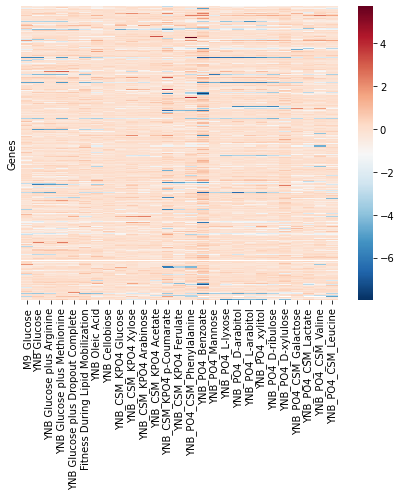

In [109]:
fig, ax = plt.subplots(figsize=(6,7), ncols=1)
sns.heatmap(Growth_Data, ax=ax, cmap='RdBu_r', xticklabels=True, yticklabels=False, mask=Growth_Data.isnull())
ax.set_ylabel('Genes')
plt.tight_layout()

In [110]:
y_data = ~(Growth_Data < -4)
y_data.loc[Growth_Data.index[Essential_genes.loc[Growth_Data.index,'Essential'] == 'Yes']] = False
y_pred = Growth_Prediction > 0.01*Growth_Prediction.max()

In [111]:
TN, FP, FN, TP = confusion_matrix(y_data.values.ravel(), y_pred.values.ravel()).ravel()
print(TN, FP, FN, TP, sum([TN, FP, FN, TP]))
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Matthew's
MCC = matthews_corrcoef(y_data.values.ravel(), y_pred.values.ravel())
print('Recall:', TPR.round(3))
print('Precision:', PPV.round(3))
print('Accuracy:', ACC.round(3))
print('Matthew\'s correlation:', MCC.round(3))

3833 3974 2549 20073 30429
Recall: 0.887
Precision: 0.835
Accuracy: 0.786
Matthew's correlation: 0.406


In [112]:
df_confusion = pd.DataFrame(confusion_matrix(y_data.values.ravel(), y_pred.values.ravel()),
                            index = pd.MultiIndex.from_product([['Experiment'],['No growth', 'Growth']]),
                            columns = pd.MultiIndex.from_product([['Prediction'],['No growth', 'Growth']]))
df_confusion

Prediction       
                      No growth Growth
Experiment No growth       3833   3974
           Growth          2549  20073

In [113]:
genes_essential = Growth_Data.index[Essential_genes.loc[Growth_Data.index,'Essential'] == 'Yes']
print('Experimentally essential in all conditions:', len(genes_essential))
genes_nonessential = Growth_Data.index[(Essential_genes.loc[Growth_Data.index,'Essential'] != 'Yes') & 
                                       ~((Growth_Data < -4).any(axis=1))]
print('Experimentally non-essential in all conditions:', len(genes_nonessential))
genes_conditionally_essential = Growth_Data.index[(Essential_genes.loc[Growth_Data.index,'Essential'] != 'Yes') & 
                                                  (Growth_Data < -4).any(axis=1)]
print('Experimentally essential in only certain conditions:', len(genes_conditionally_essential))

Experimentally essential in all conditions: 281
Experimentally non-essential in all conditions: 772
Experimentally essential in only certain conditions: 74


In [114]:
y_data = ~(Growth_Data.loc[genes_conditionally_essential] < -4)
y_pred = Growth_Prediction.loc[genes_conditionally_essential] > 0.01*Growth_Prediction.max()

In [115]:
TN, FP, FN, TP = confusion_matrix(y_data.values.ravel(), y_pred.values.ravel()).ravel()
print(TN, FP, FN, TP, sum([TN, FP, FN, TP]))
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
# Matthew's
MCC = matthews_corrcoef(y_data.values.ravel(), y_pred.values.ravel())
print('Recall:', TPR.round(3))
print('Precision:', PPV.round(3))
print('Accuracy:', ACC.round(3))
print('Matthew\'s correlation:', MCC.round(3))

96 124 302 1476 1998
Recall: 0.83
Precision: 0.922
Accuracy: 0.787
Matthew's correlation: 0.209


In [116]:
df_confusion = pd.DataFrame(confusion_matrix(y_data.values.ravel(), y_pred.values.ravel()),
                            index = pd.MultiIndex.from_product([['Experiment'],['No growth', 'Growth']]),
                            columns = pd.MultiIndex.from_product([['Prediction'],['No growth', 'Growth']]))
df_confusion

Prediction       
                      No growth Growth
Experiment No growth         96    124
           Growth           302   1476

In [117]:
model.medium

{'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_glc__D_e': 1.0,
 'EX_ca2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [118]:
sol = cobra.flux_analysis.pfba(model)
display(model.summary(sol))

In [119]:
# Remove GAM and NGAM to re-estimate
model.reactions.get_by_id('ATPM').lower_bound = 0.0
GAM_old = model.reactions.get_by_id('BIOMASS_RT').get_coefficient('adp_c')
model.reactions.get_by_id('BIOMASS_RT').add_metabolites({'atp_c': GAM_old, 'h2o_c': GAM_old,
                                                         'adp_c': -GAM_old, 'h_c': -GAM_old, 'pi_c': -GAM_old})

In [120]:
with model:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = -0.0316392670613915
    model.objective = 'ATPM'
    sol = model.optimize()
    print(sol.objective_value)
    display(model.summary())
NGAM = round(sol.objective_value,2)

1.2233849930404712


139.63945341448806 1.200039158308405e-12


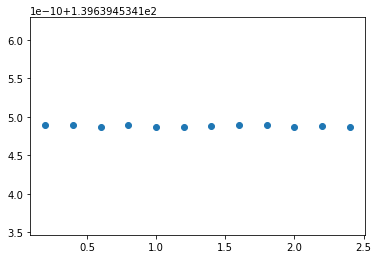

In [121]:
temp = np.arange(0.2, 2.5, 0.2)
GAM = []
for x in temp:
    with model:
        model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
        model.reactions.get_by_id('EX_glc__D_e').lower_bound = -x
        model.reactions.get_by_id('BIOMASS_RT').lower_bound = 0.0756654696*x
        model.objective = 'ATPM'
        sol = model.optimize()
        GAM.append(sol.objective_value/0.0756654696/x)
plt.scatter(temp,GAM)
print(np.mean(GAM), np.std(GAM))

[ 7.56654697e-02 -1.92296269e-16]


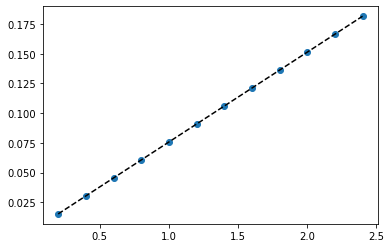

In [122]:
temp = np.arange(0.2, 2.5, 0.2)
y = []
GAM = round(np.mean(GAM), 6)
for x in temp:
    with model:
        model.reactions.get_by_id('EX_o2_e').lower_bound = -1000.0
        model.reactions.get_by_id('EX_glc__D_e').lower_bound = -x
        model.reactions.get_by_id('BIOMASS_RT').add_metabolites({'atp_c': -GAM, 'h2o_c': -GAM,
                                                                 'adp_c': GAM, 'h_c': GAM, 'pi_c': GAM})
        sol = model.optimize()
        y.append(sol.objective_value)
fit = np.polyfit(temp,y,1)
print(fit)
plt.plot(temp, y, 'o', temp, np.poly1d(fit)(temp), '--k')

In [123]:
# Set NGAM and GAM to new values
model.reactions.get_by_id('ATPM').lower_bound = NGAM
model.reactions.get_by_id('BIOMASS_RT').add_metabolites({'atp_c': -GAM, 'h2o_c': -GAM,
                                                         'adp_c': GAM, 'h_c': GAM, 'pi_c': GAM})

In [124]:
sol = cobra.flux_analysis.pfba(model)
display(model.summary(sol))

In [125]:
for r in sorted(model.reactions, key=lambda x: x.id):
    if not r.boundary and sum(abs(x) for x in r.check_mass_balance().values()) > 1e-12:
        print(r, r.gene_reaction_rule, r.check_mass_balance())

BIOMASS_RT: 0.957502 13BDglcn_c + 0.177315 16BDglcn_c + 0.001283 5mthf_c + 0.577574 alatrna_c + 0.146675 argtrna_c + 0.10797 asntrna_c + 0.197296 asptrna_c + 139.6887 atp_c + 0.002418 btn_m + 0.000832 ca2_c + 0.001792 camp_c + 0.031005 chitin_c + 1.8e-05 clpn_RT_m + 0.00077 coa_c + 0.044881 ctp_c + 0.000525 cu2_c + 0.034269 cystrna_c + 0.002451 datp_c + 0.004285 dctp_c + 0.003763 dgtp_c + 0.002523 dttp_c + 0.004031 ergst_r + 1.6e-05 ergstest_RT_r + 0.000751 fad_c + 0.000597 fe2_c + 0.000597 fe3_c + 0.117898 glntrna_c + 0.208673 glutrna_c + 0.518069 glycogen_c + 0.51322 glytrna_c + 0.00192 gthrd_c + 0.051085 gtp_c + 135.719639 h2o_c + 0.000691 hemeA_m + 0.061167 histrna_c + 0.158569 iletrna_c + 0.585703 k_c + 0.320205 leutrna_c + 0.003107 lipopb_m + 0.172334 lystrna_c + 0.807941 mannan_r + 0.05705 mettrna_c + 0.061716 mg2_c + 0.001292 mlthf_c + 0.000607 mn2_c + 0.026099 na1_c + 0.000888 nad_c + 0.000795 nadp_c + 1.4e-05 pa_RT_r + 0.000172 pc_RT_r + 0.00013 pe_RT_r + 0.095164 phetrna_c +

In [126]:
print(len(model.genes))
print(len(model.reactions))
print(len(model.metabolites))
model

1142
2398
2059


Name,R. toruloides
Memory address,0x07fea977e5f60
Number of metabolites,2059
Number of reactions,2398
Number of groups,0
Objective expression,1.0*BIOMASS_RT - 1.0*BIOMASS_RT_reverse_2b3e0
Compartments,"c, x, m, e, r, v, n, g, d, p"


In [127]:
for x in sorted(model.genes, key=lambda x: x.id):
    if not x.reactions:
        print(x)
print()
for x in sorted(model.metabolites, key=lambda x: x.id):
    if not x.reactions:
        print(x)


12ppd__S_p
14glucan_c
dha_p
h2o_p
inost_p
minohp_p
pi_p
quin_p


In [128]:
cobra.manipulation.remove_genes(model, [x for x in model.genes if not x.reactions])
model.remove_metabolites([x for x in model.metabolites if not x.reactions])

In [129]:
print(len(model.genes))
print(len(model.reactions))
print(len(model.metabolites))
print(len(set([m.id.rsplit('_',1)[0] for m in model.metabolites])))
print(len(model.compartments))
model

1142
2398
2051
1205
9


Name,R. toruloides
Memory address,0x07fea977e5f60
Number of metabolites,2051
Number of reactions,2398
Number of groups,0
Objective expression,1.0*BIOMASS_RT - 1.0*BIOMASS_RT_reverse_2b3e0
Compartments,"c, x, m, e, r, v, n, g, d"


In [130]:
cobra.io.save_json_model(model, "IFO0880_GPR_2e.json")

In [131]:
model_old = cobra.io.load_json_model("IFO0880_GPR_2d.json")
model_new = cobra.io.load_json_model("IFO0880_GPR_2e.json")

In [132]:
print('Removed reactions\n')
for r in sorted(model_old.reactions, key=lambda x: x.id):
    if r not in model_new.reactions:
        print(r)

Removed reactions

AAMYL: 14glucan_c --> malthx_c
APRAUR: 5apru_c + h_c + nadph_c --> 5aprbu_c + nadp_c
CITtp: cit_c <=> cit_x
DGGH: 6dg_c + h2o_c --> gal_c + glc__D_c
DHPPDA: 25dhpp_c + h2o_c + h_c --> 5apru_c + nh4_c
DHPPDA2: 25drapp_c + h2o_c + h_c --> 5apru_c + nh4_c
DROPPRy: 25dhpp_c + h_c + nadph_c --> 25dthpp_c + nadp_c
G1PTT: dttp_c + g1p_c + h_c --> dtdpglu_c + ppi_c
GALO: gal_n + h2o_n + o2_n --> galctn__D_n + h2o2_n + h_n
GGNG: Tyr_ggn_c + 8.0 udpg_c --> ggn_c + 8.0 h_c + 8.0 udp_c
GLBRAN: glygn1_c --> glygn2_c
GLBRAN2: glycogen_c --> bglycogen_c
GLCGSDv: glycogen_v + h2o_v --> glc__D_v
GLCP2: bglycogen_c + pi_c --> g1p_c
GLDBRAN: dxtrn_c + h2o_c --> glc__D_c + glygn3_c
GLGNS1: ggn_c + 3.0 udpg_c --> glygn1_c + 3.0 h_c + 3.0 udp_c
GLPASE1: glygn2_c + 3.0 pi_c --> dxtrn_c + 3.0 g1p_c
GLPASE2: glygn3_c + 7.0 h2o_c --> Tyr_ggn_c + 7.0 glc__D_c
GTPCII2: gtp_c + 3.0 h2o_c --> 25drapp_c + for_c + 2.0 h_c + ppi_c
MAN1PT2: gdp_c + h_c + man1p_c --> gdpmann_c + pi_c
MI14PP: h2o_c + m

In [133]:
print('Updated reactions\n')
for r in sorted(model_old.reactions, key=lambda x: x.id):
    if r in model_new.reactions:
        r2 = model_new.reactions.get_by_id(r.id)
        if (r.name == r2.name and r.reaction == r2.reaction and r.gene_reaction_rule == r2.gene_reaction_rule and
            r.lower_bound == r2.lower_bound and r.upper_bound == r2.upper_bound):
            pass
        else:
            print('Old', r, r.gene_reaction_rule)
            print('New', r2, r2.gene_reaction_rule)
            print()

Updated reactions

Old ACCOAC: accoa_c + atp_c + hco3_c --> adp_c + h_c + malcoa_c + pi_c 8639
New ACCOAC: accoa_c + atp_c + hco3_c --> adp_c + h_c + malcoa_c + pi_c 8639 and 16404

Old ASNS1: asp__L_c + atp_c + gln__L_c + h2o_c --> amp_c + asn__L_c + glu__L_c + h_c + ppi_c 14762 or 15137
New ASNS1: asp__L_c + atp_c + gln__L_c + h2o_c --> amp_c + asn__L_c + glu__L_c + h_c + ppi_c 15137

Old BIOMASS_RT: 0.957502 13BDglcn_c + 0.177315 16BDglcn_c + 0.001283 5mthf_c + 0.577574 alatrna_c + 0.146675 argtrna_c + 0.10797 asntrna_c + 0.197296 asptrna_c + 140.298633 atp_c + 0.002418 btn_m + 0.000832 ca2_c + 0.001792 camp_c + 0.031005 chitin_c + 1.8e-05 clpn_RT_m + 0.00077 coa_c + 0.044881 ctp_c + 0.000525 cu2_c + 0.034269 cystrna_c + 0.002451 datp_c + 0.004285 dctp_c + 0.003763 dgtp_c + 0.002523 dttp_c + 0.004031 ergst_r + 1.6e-05 ergstest_RT_r + 0.000751 fad_c + 0.000597 fe2_c + 0.000597 fe3_c + 0.117898 glntrna_c + 0.208673 glutrna_c + 0.518069 glycogen_c + 0.51322 glytrna_c + 0.00192 gthrd_c 

In [134]:
print('Added reactions\n')
for r in sorted(model_new.reactions, key=lambda x: x.id):
    if r not in model_old.reactions:
        print(r)

Added reactions

12PPDRte: 12ppd__R_c <=> 12ppd__R_e
12PPDSt: 12ppd__S_e <=> 12ppd__S_c
2PGPe: 2pg_e + h2o_e --> glyc__R_e + pi_e
3PGPe: 3pg_e + h2o_e --> glyc__R_e + pi_e
3SALAt: 3sala_e <=> 3sala_c
4ABUTtm: 4abut_c <=> 4abut_m
4HBZte: 4hbz_c <=> 4hbz_e
5DGLCNt: 5dglcn_e <=> 5dglcn_c
AAMYLASE: 6.0 14glun_c --> 5.0 h2o_c + malthx_c
ACACt2: acac_e + h_e <=> acac_c + h_c
ACACt2m: acac_c + h_c <=> acac_m + h_m
ACACtx: acac_c <=> acac_x
ACGLUtd: acglu_c <=> acglu_e
ADtr: ad_e <=> ad_c
AGMt_m: agm_c <=> agm_m
AGRMte: agm_c <=> agm_e
ARAB_Dt: arab__D_e <=> arab__D_c
ARBTHe: arbt_e + h2o_e --> glc__D_e + hqn_e
ASPDTDe: asp__D_c <=> asp__D_e
BG_CELLB: cellb_e + h2o_e --> 2.0 glc__D_e
BG_MBDG: h2o_e + mbdg_e --> glc__D_e + meoh_e
BHBt: bhb_e + h_e <=> bhb_c + h_c
BHBtm: bhb_c + h_c <=> bhb_m + h_m
BTDt_RR: btd_RR_c <=> btd_RR_e
BTNt2i: btn_e + h_e --> btn_c + h_c
BUTt: but_e <=> but_c
C40CPT1: btcoa_c + crn_c --> c4crn_c + coa_c
C40CPT2: c4crn_m + coa_m --> btcoa_m + crn_m
C40CRNt: c4crn_c --> 